In [1]:
import mlrose_hiive as mh
from mlrose_hiive.runners import SARunner, GARunner, MIMICRunner, RHCRunner
from mlrose_hiive import QueensGenerator, QueensOpt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [260]:
fitness_ff = mh.FlipFlop()
fitness_cp = mh.ContinuousPeaks()
ff_fitnesses = []
cp_fitnesses = []
# Function to print the output
def printTheArray(arr, n):
    ff_fitnesses.append(fitness_ff.evaluate(arr))
    cp_fitnesses.append(fitness_cp.evaluate(arr))
    for i in range(0, n):
        print(arr[i], end = " ")
     
    print()
    
 
# Function to generate all binary strings
def generateAllBinaryStrings(n, arr, i):
 
    if i == n:
        printTheArray(arr, n)
        return
     
    # First assign "0" at ith position
    # and try for all other permutations
    # for remaining positions
    arr[i] = 0
    generateAllBinaryStrings(n, arr, i + 1)
 
    # And then assign "1" at ith position
    # and try for all other permutations
    # for remaining positions
    arr[i] = 1
    generateAllBinaryStrings(n, arr, i + 1)
 
 
n = 8
arr = [None] * n

# Print all binary strings
generateAllBinaryStrings(n, arr, 0)

0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 1 
0 0 0 0 0 0 1 0 
0 0 0 0 0 0 1 1 
0 0 0 0 0 1 0 0 
0 0 0 0 0 1 0 1 
0 0 0 0 0 1 1 0 
0 0 0 0 0 1 1 1 
0 0 0 0 1 0 0 0 
0 0 0 0 1 0 0 1 
0 0 0 0 1 0 1 0 
0 0 0 0 1 0 1 1 
0 0 0 0 1 1 0 0 
0 0 0 0 1 1 0 1 
0 0 0 0 1 1 1 0 
0 0 0 0 1 1 1 1 
0 0 0 1 0 0 0 0 
0 0 0 1 0 0 0 1 
0 0 0 1 0 0 1 0 
0 0 0 1 0 0 1 1 
0 0 0 1 0 1 0 0 
0 0 0 1 0 1 0 1 
0 0 0 1 0 1 1 0 
0 0 0 1 0 1 1 1 
0 0 0 1 1 0 0 0 
0 0 0 1 1 0 0 1 
0 0 0 1 1 0 1 0 
0 0 0 1 1 0 1 1 
0 0 0 1 1 1 0 0 
0 0 0 1 1 1 0 1 
0 0 0 1 1 1 1 0 
0 0 0 1 1 1 1 1 
0 0 1 0 0 0 0 0 
0 0 1 0 0 0 0 1 
0 0 1 0 0 0 1 0 
0 0 1 0 0 0 1 1 
0 0 1 0 0 1 0 0 
0 0 1 0 0 1 0 1 
0 0 1 0 0 1 1 0 
0 0 1 0 0 1 1 1 
0 0 1 0 1 0 0 0 
0 0 1 0 1 0 0 1 
0 0 1 0 1 0 1 0 
0 0 1 0 1 0 1 1 
0 0 1 0 1 1 0 0 
0 0 1 0 1 1 0 1 
0 0 1 0 1 1 1 0 
0 0 1 0 1 1 1 1 
0 0 1 1 0 0 0 0 
0 0 1 1 0 0 0 1 
0 0 1 1 0 0 1 0 
0 0 1 1 0 0 1 1 
0 0 1 1 0 1 0 0 
0 0 1 1 0 1 0 1 
0 0 1 1 0 1 1 0 
0 0 1 1 0 1 1 1 
0 0 1 1 1 0 0 0 
0 0 1 1 1 0 0 1 
0 0 1 1 1 0 1 

In [240]:
len(ff_fitnesses)

256

In [242]:
min(ff_fitnesses)

0

# 8 Queens Problem

Minimize the number of pairs of attacking queens

In [3]:
problem = QueensGenerator().generate(seed=1, size=8)

## Simulated Annealing

In [32]:
sa_exp = SARunner(problem=problem,
              experiment_name='queens8_sa',
              output_directory=None,
              seed=1,
              iteration_list=2 ** np.arange(11),
              max_attempts=100,
              temperature_list=[2.0, 1.5, 1.0, 0.75, 0.66, 0.5, 0.1],
              decay_list=[mh.ExpDecay],
              generate_curves=True)
stats_sa, curves_sa = sa_exp.run()

In [33]:
curves_sa[curves_sa['Temperature'] == mh.ExpDecay(0.5)].shape

(91, 6)

In [34]:
curves_sa['Fitness'][curves_sa['Temperature'] == mh.ExpDecay(0.5)].shape

(91,)

In [35]:
stats_sa.head()

Iteration  Fitness  FEvals      Time                     State  \
0          0      5.0       0  0.000676  [5, 3, 4, 0, 7, 1, 3, 5]   
1          1      5.0       2  0.002691  [5, 3, 4, 0, 7, 1, 3, 0]   
2          2      5.0       3  0.004357  [5, 3, 4, 0, 7, 1, 3, 0]   
3          4      5.0       7  0.006606  [5, 2, 4, 0, 6, 1, 3, 0]   
4          8      6.0      14  0.009104  [5, 2, 4, 0, 6, 1, 3, 2]   

  schedule_type  schedule_init_temp  schedule_exp_const  schedule_min_temp  \
0   exponential                 2.0               0.005              0.001   
1   exponential                 2.0               0.005              0.001   
2   exponential                 2.0               0.005              0.001   
3   exponential                 2.0               0.005              0.001   
4   exponential                 2.0               0.005              0.001   

   schedule_current_value Temperature  max_iters  
0                1.999993         2.0       1024  
1                1.999973         2.0       1024  
2                1.999956         2.0       1024  
3                1.999934         2.0       1024  
4                1.999909         2.0       1024

In [36]:
stats_sa['schedule_init_temp'].value_counts()

2.00    12
1.50    12
1.00    12
0.75    12
0.66    12
0.50    12
0.10    12
Name: schedule_init_temp, dtype: int64

In [37]:
curves_sa.Temperature.value_counts()

0.1     734
1.0     702
0.66    522
0.75    223
0.5      91
2.0      77
1.5      76
Name: Temperature, dtype: int64

In [38]:
best_fitness_exp = curves_sa['Fitness'].min()
best_runs_exp = curves_sa[curves_sa['Fitness'] == best_fitness_exp]
best_runs_exp.head()

Iteration      Time  Fitness  FEvals Temperature  max_iters
76           76  0.032268      0.0   130.0         2.0       1024
152          75  0.031994      0.0   127.0         1.5       1024
854         701  0.142405      0.0   857.0         1.0       1024
1077        222  0.025179      0.0   278.0        0.75       1024
1599        521  0.096859      0.0   623.0        0.66       1024

In [39]:
min_evals_exp = best_runs_exp['FEvals'].min()
best_min_eval_exp = best_runs_exp[best_runs_exp['FEvals'] == min_evals_exp]
best_min_eval_exp.head()

Iteration      Time  Fitness  FEvals Temperature  max_iters
1690         90  0.010159      0.0   120.0         0.5       1024

In [40]:
curves_sa[curves_sa['Temperature'] == mh.ExpDecay(0.5)]

Iteration      Time  Fitness  FEvals Temperature  max_iters
1600          0  0.000676      5.0     0.0         0.5       1024
1601          1  0.002691      5.0     2.0         0.5       1024
1602          2  0.004357      5.0     3.0         0.5       1024
1603          3  0.006153      4.0     5.0         0.5       1024
1604          4  0.006606      4.0     6.0         0.5       1024
...         ...       ...      ...     ...         ...        ...
1686         86  0.009187      2.0   115.0         0.5       1024
1687         87  0.009463      2.0   116.0         0.5       1024
1688         88  0.009737      2.0   117.0         0.5       1024
1689         89  0.009888      2.0   118.0         0.5       1024
1690         90  0.010159      0.0   120.0         0.5       1024

[91 rows x 6 columns]

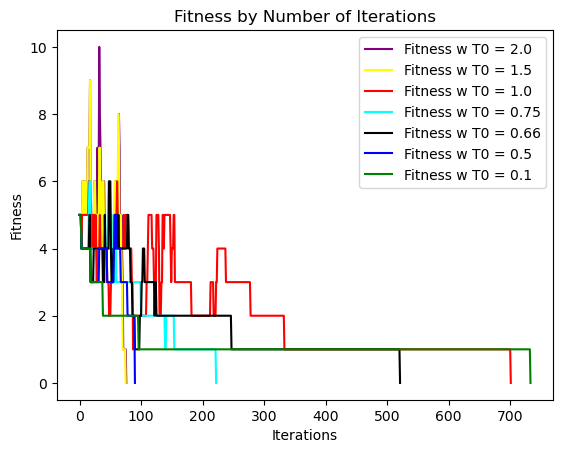

In [42]:
fig, ax = plt.subplots()
ax.plot(curves_sa['Iteration'][curves_sa['Temperature'] == mh.ExpDecay(2.0)], curves_sa['Fitness'][curves_sa['Temperature'] == mh.ExpDecay(2.0)],
    label = "Fitness w T0 = 2.0", color = 'purple')
ax.plot(curves_sa['Iteration'][curves_sa['Temperature'] == mh.ExpDecay(1.5)], curves_sa['Fitness'][curves_sa['Temperature'] == mh.ExpDecay(1.5)],
    label = "Fitness w T0 = 1.5", color = 'yellow')
ax.plot(curves_sa['Iteration'][curves_sa['Temperature'] == mh.ExpDecay(1.0)], curves_sa['Fitness'][curves_sa['Temperature'] == mh.ExpDecay(1.0)],
    label = "Fitness w T0 = 1.0", color = 'red')
ax.plot(curves_sa['Iteration'][curves_sa['Temperature'] == mh.ExpDecay(0.75)], curves_sa['Fitness'][curves_sa['Temperature'] == mh.ExpDecay(0.75)],
    label = "Fitness w T0 = 0.75", color = 'cyan')
ax.plot(curves_sa['Iteration'][curves_sa['Temperature'] == mh.ExpDecay(0.66)], curves_sa['Fitness'][curves_sa['Temperature'] == mh.ExpDecay(0.66)],
    label = "Fitness w T0 = 0.66", color = 'black')
ax.plot(curves_sa['Iteration'][curves_sa['Temperature'] == mh.ExpDecay(0.5)], curves_sa['Fitness'][curves_sa['Temperature'] == mh.ExpDecay(0.5)], 
        label = "Fitness w T0 = 0.5", color = 'blue')
ax.plot(curves_sa['Iteration'][curves_sa['Temperature'] == mh.ExpDecay(0.1)], curves_sa['Fitness'][curves_sa['Temperature'] == mh.ExpDecay(0.1)],
    label = "Fitness w T0 = 0.1", color = 'green')


legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Fitness by Number of Iterations')
plt.show()

In [43]:
fig, ax = plt.subplots()
ax.plot(curves_sa['Iteration'][curves_sa['Temperature'] == mh.ExpDecay(2.0)], curves_sa['FEvals'][curves_sa['Temperature'] == mh.ExpDecay(2.0)],
    label = "Fitness w T0 = 2.0", color = 'purple')
ax.plot(curves_sa['Iteration'][curves_sa['Temperature'] == mh.ExpDecay(1.5)], curves_sa['FEvals'][curves_sa['Temperature'] == mh.ExpDecay(1.5)],
    label = "Fitness w T0 = 1.5", color = 'yellow')
ax.plot(curves_sa['Iteration'][curves_sa['Temperature'] == mh.ExpDecay(1.0)], curves_sa['FEvals'][curves_sa['Temperature'] == mh.ExpDecay(1.0)],
    label = "Fitness w T0 = 1.0", color = 'red')
ax.plot(curves_sa['Iteration'][curves_sa['Temperature'] == mh.ExpDecay(0.75)], curves_sa['FEvals'][curves_sa['Temperature'] == mh.ExpDecay(0.75)],
    label = "Fitness w T0 = 0.75", color = 'cyan')
ax.plot(curves_sa['Iteration'][curves_sa['Temperature'] == mh.ExpDecay(0.66)], curves_sa['FEvals'][curves_sa['Temperature'] == mh.ExpDecay(0.66)],
    label = "Fitness w T0 = 0.66", color = 'black')
ax.plot(curves_sa['Iteration'][curves_sa['Temperature'] == mh.ExpDecay(0.5)], curves_sa['FEvals'][curves_sa['Temperature'] == mh.ExpDecay(0.5)], 
        label = "Fitness w T0 = 0.5", color = 'blue')
ax.plot(curves_sa['Iteration'][curves_sa['Temperature'] == mh.ExpDecay(0.1)], curves_sa['FEvals'][curves_sa['Temperature'] == mh.ExpDecay(0.1)],
    label = "Fitness w T0 = 0.1", color = 'green')


legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('FEvals')
plt.title('FEvals by Number of Iterations')
plt.show()

In [44]:
fig, ax = plt.subplots()
ax.plot(curves_sa['Iteration'][curves_sa['Temperature'] == mh.ExpDecay(2.0)], curves_sa['FEvals'][curves_sa['Temperature'] == mh.ExpDecay(2.0)],
    label = "Fitness w T0 = 2.0", color = 'purple')
ax.plot(curves_sa['Iteration'][curves_sa['Temperature'] == mh.ExpDecay(1.5)], curves_sa['FEvals'][curves_sa['Temperature'] == mh.ExpDecay(1.5)],
    label = "Fitness w T0 = 1.5", color = 'yellow')
ax.plot(curves_sa['Iteration'][curves_sa['Temperature'] == mh.ExpDecay(0.75)], curves_sa['FEvals'][curves_sa['Temperature'] == mh.ExpDecay(0.75)],
    label = "Fitness w T0 = 0.75", color = 'cyan')
ax.plot(curves_sa['Iteration'][curves_sa['Temperature'] == mh.ExpDecay(0.5)], curves_sa['FEvals'][curves_sa['Temperature'] == mh.ExpDecay(0.5)], 
        label = "Fitness w T0 = 0.5", color = 'blue')


legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('FEvals')
plt.title('FEvals by Number of Iterations')
plt.show()

### Varying the Problem Size

In [13]:
results = []

for i in np.arange(9,100,1):
    problem = QueensGenerator().generate(seed=1, size=i)
    sa_exp = SARunner(problem=problem,
              experiment_name='queens8_sa',
              output_directory=None,
              seed=1,
              iteration_list=2 ** np.arange(11),
              max_attempts=100,
              temperature_list=[0.5],
              decay_list=[mh.ExpDecay],
              generate_curves=True)
    stats_exp, curves_exp = sa_exp.run()

    best_fitness_exp = curves_exp['Fitness'].min()
    best_runs_exp = curves_exp[curves_exp['Fitness'] == best_fitness_exp]
    min_evals_exp = best_runs_exp['FEvals'].min()
    best_min_eval_exp = best_runs_exp[best_runs_exp['FEvals'] == min_evals_exp]
    results.append(best_min_eval_exp)
    


In [14]:
df = results[0]

for result in results[1:]:
    df = pd.concat([df,result])

In [15]:
df.shape

(91, 6)

In [16]:
df.head()

Iteration      Time  Fitness  FEvals Temperature  max_iters
52          52  0.018003      0.0    70.0         0.5       1024
256        256  0.061601      1.0   295.0         0.5       1024
147        147  0.041935      1.0   188.0         0.5       1024
312        312  0.089889      1.0   386.0         0.5       1024
204        204  0.058777      1.0   239.0         0.5       1024

In [6]:
df[df.Fitness < 1].sort_values(by=['Iteration'])

Iteration      Time  Fitness  FEvals Temperature  max_iters
52         52  0.018278      0.0    70.0         0.5       1024

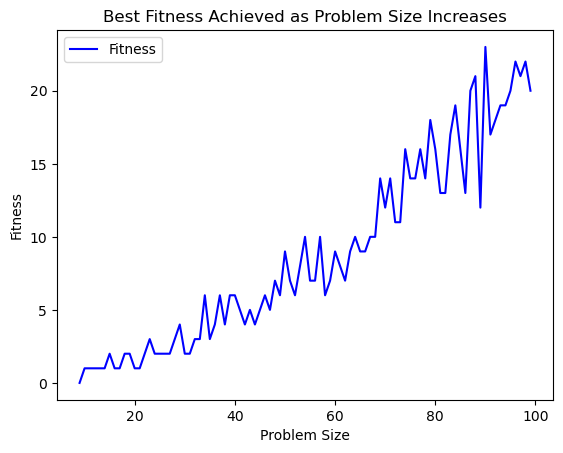

In [18]:
fig, ax = plt.subplots()
ax.plot(np.arange(9,100,1), df.Fitness,
    label = "Fitness", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.title('Best Fitness Achieved as Problem Size Increases')
plt.show()

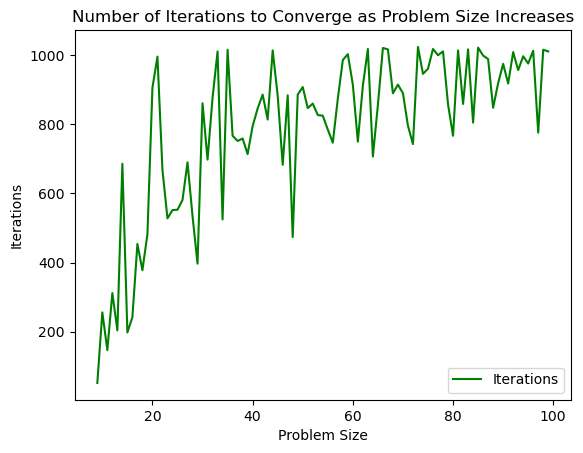

In [23]:
fig, ax = plt.subplots()
ax.plot(np.arange(9,100,1), df.Iteration,
    label = "Iterations", color = 'g')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Iterations')
plt.title('Number of Iterations to Converge as Problem Size Increases')
plt.show()

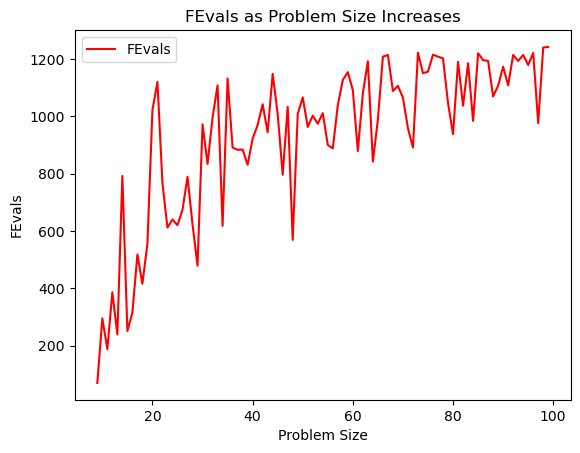

In [24]:
fig, ax = plt.subplots()
ax.plot(np.arange(9,100,1), df.FEvals,
    label = "FEvals", color = 'r')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('FEvals')
plt.title('FEvals as Problem Size Increases')
plt.show()

## Random Hill Climbing

In [55]:
problem = QueensGenerator().generate(seed=1, size=8)
rhc = RHCRunner(problem=problem, 
                experiment_name='queens8_rhc', 
                seed=1, 
                restart_list=[10], 
                max_attempts=100, 
                generate_curves=True,
                iteration_list=2 ** np.arange(11))
stats, curves = rhc.run()

In [56]:
stats

Iteration  Fitness  FEvals      Time                     State  Restarts  \
0           0      5.0       0  0.000416  [5, 3, 4, 0, 7, 1, 3, 5]        10   
1           1      5.0       1  0.001617  [5, 3, 4, 0, 7, 1, 3, 5]        10   
2           2      5.0       2  0.002531  [5, 3, 4, 0, 7, 1, 3, 5]        10   
3           4      5.0       4  0.003617  [5, 3, 4, 0, 7, 1, 3, 5]        10   
4           8      4.0       9  0.005047  [5, 2, 4, 0, 7, 1, 3, 5]        10   
5          16      4.0      17  0.007194  [5, 2, 4, 0, 7, 1, 3, 5]        10   
6          32      4.0      33  0.010176  [5, 2, 4, 0, 7, 1, 3, 5]        10   
7          64      2.0      67  0.015949  [5, 2, 4, 7, 7, 1, 3, 6]        10   
8         128      0.0      77  0.018447  [5, 2, 0, 7, 4, 1, 3, 6]        10   
9         256      0.0      77  0.018447  [5, 2, 0, 7, 4, 1, 3, 6]        10   
10        512      0.0      77  0.018447  [5, 2, 0, 7, 4, 1, 3, 6]        10   
11       1024      0.0      77  0.018447  [5, 2, 0, 7, 4, 1, 3, 6]        10   

    max_iters  current_restart  
0        1024                0  
1        1024                0  
2        1024                0  
3        1024                0  
4        1024                0  
5        1024                0  
6        1024                0  
7        1024                0  
8        1024                0  
9        1024                0  
10       1024                0  
11       1024                0

In [43]:
fig, ax = plt.subplots()
ax.plot(curves['Iteration'], curves['Fitness'],
    label = "Fitness", color = 'purple')


legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Fitness by Number of Iterations')
plt.show()

In [44]:
curves[curves['Fitness'] == curves['Fitness'].min()]

Iteration      Time  Fitness  FEvals  Restarts  max_iters  current_restart
72         72  0.018447      0.0    77.0        10       1024                0

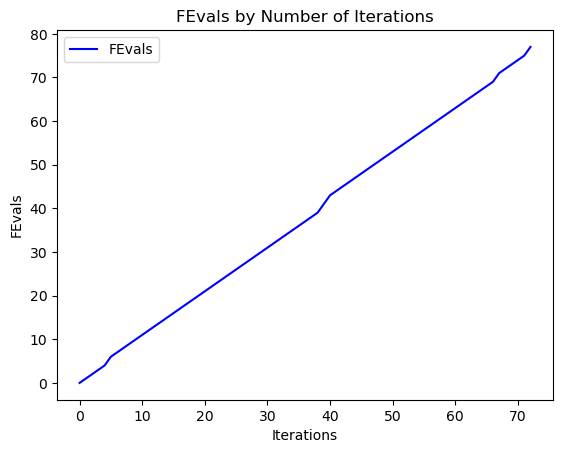

In [57]:
fig, ax = plt.subplots()
ax.plot(curves['Iteration'], curves['FEvals'],
    label = "FEvals", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('FEvals')
plt.title('FEvals by Number of Iterations')
plt.show()

In [18]:
results = []

for i in np.arange(9,30):
    problem = QueensGenerator().generate(seed=1, size=i)
    rhc = RHCRunner(problem=problem, 
                    experiment_name='queens8_rhc', 
                    seed=1, 
                    restart_list=[10,20,30], 
                    max_attempts=100, 
                    generate_curves=True,
                    iteration_list=2 ** np.arange(11))
    stats, curves = rhc.run()
    curves['ProblemSize'] = i
    best_fitness = curves['Fitness'].min()
    best_runs = curves[curves['Fitness'] == best_fitness]
    min_evals = best_runs['FEvals'].min()
    best_min_eval = best_runs[best_runs['FEvals'] == min_evals]
    results.append(best_min_eval)

In [11]:
results[6]

Iteration      Time  Fitness  FEvals  Restarts  max_iters  \
2156        230  0.075883      0.0  2235.0        10       1024   
4313        230  0.075883      0.0  2235.0        20       1024   
6470        230  0.075883      0.0  2235.0        30       1024   

      current_restart  ProblemSize  
2156                9           15  
4313                9           15  
6470                9           15

In [19]:
df = results[0]

for result in results[1:]:
    df = pd.concat([df,result])

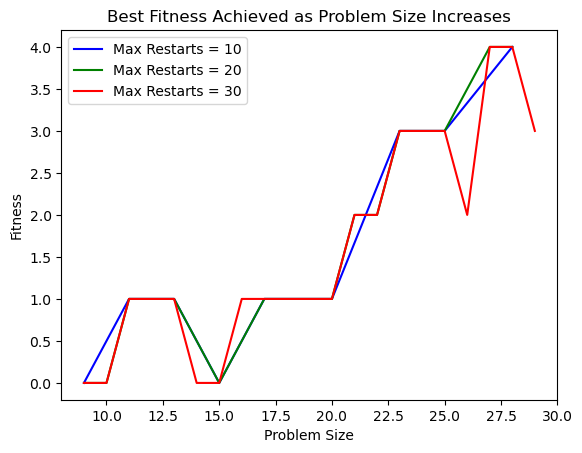

In [20]:
fig, ax = plt.subplots()
ax.plot(df.ProblemSize[df.Restarts == 10], df.Fitness[df.Restarts == 10],
    label = "Max Restarts = 10", color = 'b')
ax.plot(df.ProblemSize[df.Restarts == 20], df.Fitness[df.Restarts == 20],
    label = "Max Restarts = 20", color = 'g')
ax.plot(df.ProblemSize[df.Restarts == 30], df.Fitness[df.Restarts == 30],
    label = "Max Restarts = 30", color = 'r')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.title('Best Fitness Achieved as Problem Size Increases')
plt.show()

In [21]:
fig, ax = plt.subplots()
ax.plot(df.ProblemSize[df.Restarts == 30], df.current_restart[df.Restarts == 30],
    label = "Max Restarts = 30", color = 'r')
ax.plot(df.ProblemSize[df.Restarts == 20], df.current_restart[df.Restarts == 20],
    label = "Max Restarts = 20", color = 'g')
ax.plot(df.ProblemSize[df.Restarts == 10], df.current_restart[df.Restarts == 10],
    label = "Max Restarts = 10", color = 'b')




legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('# Restarts')
plt.title('# of Restarts Required to Converge')
plt.show()

In [22]:
fig, ax = plt.subplots()
ax.plot(df.ProblemSize[df.Restarts == 30], df.FEvals[df.Restarts == 30],
    label = "Max Restarts = 30", color = 'r')
ax.plot(df.ProblemSize[df.Restarts == 20], df.FEvals[df.Restarts == 20],
    label = "Max Restarts = 20", color = 'g')
ax.plot(df.ProblemSize[df.Restarts == 10], df.FEvals[df.Restarts == 10],
    label = "Max Restarts = 10", color = 'b')




legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('# FEvals')
plt.title('# of FEvals as Problem Size Increases')
plt.show()

In [32]:
problem = QueensGenerator().generate(seed=1, size=8)
ga = GARunner(problem=problem,
              experiment_name='queens8_ga',
              iteration_list=2 ** np.arange(11),
              mutation_rates=[0.01, 0.05, 0.1, 0.2],
              population_sizes=[100],
              seed=1,
              generate_curves=True)
stats, curves = ga.run()

In [33]:
stats
# stats[stats['Mutation Rate'] == 0.2]

Iteration  Fitness  FEvals      Time                     State  \
0           0      5.0     100  0.013578  [5, 3, 4, 0, 7, 1, 3, 5]   
1           1      3.0     202  0.029660  [3, 0, 7, 4, 6, 6, 2, 7]   
2           2      3.0     303  0.045328  [3, 0, 7, 4, 6, 6, 2, 7]   
3           4      3.0     505  0.075819  [3, 0, 7, 4, 6, 6, 2, 7]   
4           8      2.0     910  0.135955  [0, 6, 1, 6, 2, 5, 7, 4]   
5          16      1.0    1719  0.255497  [3, 0, 4, 1, 5, 2, 2, 7]   
6          32      1.0    3335  0.499328  [3, 0, 4, 1, 5, 2, 2, 7]   
7          64      1.0    6567  0.976857  [3, 0, 4, 1, 5, 2, 2, 7]   
8         128      1.0   13031  1.920154  [3, 0, 4, 1, 5, 2, 2, 7]   
9         256      1.0   25959  3.799603  [3, 0, 4, 1, 5, 2, 2, 7]   
10        512      1.0   51613  7.540146  [3, 0, 4, 1, 5, 2, 2, 7]   
11       1024      1.0   51613  7.540146  [3, 0, 4, 1, 5, 2, 2, 7]   
12          0      5.0     100  0.012668  [5, 3, 4, 0, 7, 1, 3, 5]   
13          1      3.0     202  0.029170  [3, 0, 7, 4, 6, 6, 2, 7]   
14          2      3.0     303  0.045637  [3, 0, 7, 4, 6, 6, 2, 7]   
15          4      3.0     505  0.076465  [3, 0, 7, 4, 6, 6, 2, 7]   
16          8      2.0     910  0.136546  [3, 0, 7, 1, 6, 6, 2, 7]   
17         16      1.0    1719  0.256516  [2, 5, 7, 2, 0, 6, 4, 1]   
18         32      0.0    2023  0.302867  [3, 5, 7, 2, 0, 6, 4, 1]   
19         64      0.0    2023  0.302867  [3, 5, 7, 2, 0, 6, 4, 1]   
20        128      0.0    2023  0.302867  [3, 5, 7, 2, 0, 6, 4, 1]   
21        256      0.0    2023  0.302867  [3, 5, 7, 2, 0, 6, 4, 1]   
22        512      0.0    2023  0.302867  [3, 5, 7, 2, 0, 6, 4, 1]   
23       1024      0.0    2023  0.302867  [3, 5, 7, 2, 0, 6, 4, 1]   
24          0      5.0     100  0.012823  [5, 3, 4, 0, 7, 1, 3, 5]   
25          1      3.0     202  0.029402  [3, 0, 7, 4, 6, 6, 2, 7]   
26          2      2.0     304  0.045997  [5, 0, 2, 4, 6, 3, 7, 4]   
27          4      2.0     506  0.076783  [5, 0, 2, 4, 6, 3, 7, 4]   
28          8      2.0     910  0.137260  [5, 0, 2, 4, 6, 3, 7, 4]   
29         16      1.0    1719  0.257214  [4, 0, 5, 3, 1, 3, 7, 2]   
30         32      1.0    3335  0.498658  [4, 0, 5, 3, 1, 3, 7, 2]   
31         64      0.0    3437  0.515526  [3, 1, 7, 4, 6, 0, 2, 5]   
32        128      0.0    3437  0.515526  [3, 1, 7, 4, 6, 0, 2, 5]   
33        256      0.0    3437  0.515526  [3, 1, 7, 4, 6, 0, 2, 5]   
34        512      0.0    3437  0.515526  [3, 1, 7, 4, 6, 0, 2, 5]   
35       1024      0.0    3437  0.515526  [3, 1, 7, 4, 6, 0, 2, 5]   
36          0      5.0     100  0.012832  [5, 3, 4, 0, 7, 1, 3, 5]   
37          1      3.0     202  0.029295  [3, 5, 2, 2, 7, 6, 4, 0]   
38          2      3.0     303  0.045727  [3, 5, 2, 2, 7, 6, 4, 0]   
39          4      2.0     506  0.077295  [7, 7, 0, 3, 1, 7, 5, 2]   
40          8      1.0     911  0.139100  [3, 7, 0, 2, 5, 5, 1, 4]   
41         16      1.0    1719  0.260043  [3, 7, 0, 2, 5, 5, 1, 4]   
42         32      1.0    3335  0.497153  [3, 7, 0, 2, 5, 5, 1, 4]   
43         64      0.0    4548  0.675558  [3, 7, 0, 2, 5, 1, 6, 4]   
44        128      0.0    4548  0.675558  [3, 7, 0, 2, 5, 1, 6, 4]   
45        256      0.0    4548  0.675558  [3, 7, 0, 2, 5, 1, 6, 4]   
46        512      0.0    4548  0.675558  [3, 7, 0, 2, 5, 1, 6, 4]   
47       1024      0.0    4548  0.675558  [3, 7, 0, 2, 5, 1, 6, 4]   

    Population Size  Mutation Rate  max_iters  
0               100           0.01       1024  
1               100           0.01       1024  
2               100           0.01       1024  
3               100           0.01       1024  
4               100           0.01       1024  
5               100           0.01       1024  
6               100           0.01       1024  
7               100           0.01       1024  
8               100           0.01       1024  
9               100           0.01       1024  
10              100           0.01       1024

In [35]:
curves[curves['Mutation Rate'] == 0.01]

Iteration      Time  Fitness   FEvals  Population Size  Mutation Rate  \
0            0  0.013578      5.0    100.0              100           0.01   
1            1  0.029660      3.0    202.0              100           0.01   
2            2  0.045328      3.0    303.0              100           0.01   
3            3  0.061007      3.0    404.0              100           0.01   
4            4  0.075819      3.0    505.0              100           0.01   
..         ...       ...      ...      ...              ...            ...   
506        506  7.481919      1.0  51209.0              100           0.01   
507        507  7.496459      1.0  51310.0              100           0.01   
508        508  7.510973      1.0  51411.0              100           0.01   
509        509  7.525548      1.0  51512.0              100           0.01   
510        510  7.540146      1.0  51613.0              100           0.01   

     max_iters  
0         1024  
1         1024  
2         1024  
3         1024  
4         1024  
..         ...  
506       1024  
507       1024  
508       1024  
509       1024  
510       1024  

[511 rows x 7 columns]

In [34]:
fig, ax = plt.subplots()
ax.plot(curves['Iteration'][curves['Mutation Rate'] == 0.01], curves['Fitness'][curves['Mutation Rate'] == 0.01],
    label = "Mutation Rate = 0.01", color = 'blue')
ax.plot(curves['Iteration'][curves['Mutation Rate'] == 0.05], curves['Fitness'][curves['Mutation Rate'] == 0.05],
    label = "Mutation Rate = 0.05", color = 'green')
ax.plot(curves['Iteration'][curves['Mutation Rate'] == 0.1], curves['Fitness'][curves['Mutation Rate'] == 0.1],
    label = "Mutation Rate = 0.1", color = 'red')
ax.plot(curves['Iteration'][curves['Mutation Rate'] == 0.2], curves['Fitness'][curves['Mutation Rate'] == 0.2],
    label = "Mutation Rate = 0.2", color = 'purple')

legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Fitness by Number of Iterations')
plt.show()

In [37]:
fig, ax = plt.subplots()
ax.plot(curves['Iteration'][curves['Mutation Rate'] == 0.01], curves['FEvals'][curves['Mutation Rate'] == 0.01],
    label = "Mutation Rate = 0.01", color = 'blue')
legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('FEvals')
plt.title('FEvals by Number of Iterations')
plt.show()

In [38]:
fig, ax = plt.subplots()
ax.plot(curves['Iteration'][curves['Mutation Rate'] == 0.05], curves['FEvals'][curves['Mutation Rate'] == 0.05],
    label = "Mutation Rate = 0.05", color = 'green')


legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('FEvals')
plt.title('FEvals by Number of Iterations')
plt.show()

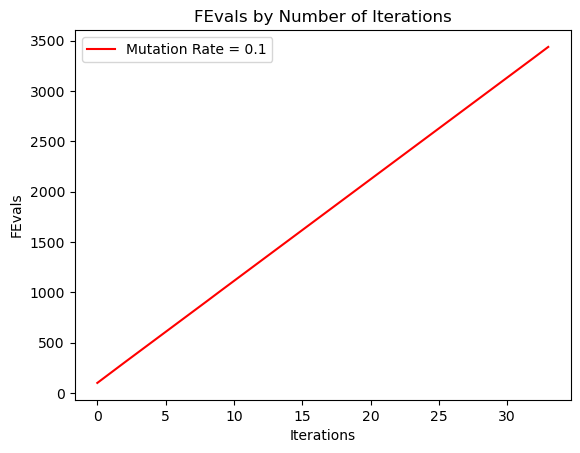

In [39]:
fig, ax = plt.subplots()
ax.plot(curves['Iteration'][curves['Mutation Rate'] == 0.1], curves['FEvals'][curves['Mutation Rate'] == 0.1],
    label = "Mutation Rate = 0.1", color = 'red')

legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('FEvals')
plt.title('FEvals by Number of Iterations')
plt.show()

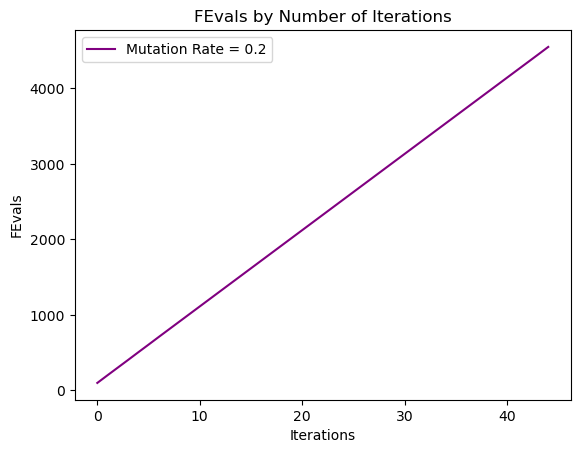

In [40]:
fig, ax = plt.subplots()

ax.plot(curves['Iteration'][curves['Mutation Rate'] == 0.2], curves['FEvals'][curves['Mutation Rate'] == 0.2],
    label = "Mutation Rate = 0.2", color = 'purple')

legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('FEvals')
plt.title('FEvals by Number of Iterations')
plt.show()

In [41]:
results = []

for i in np.arange(9,30):

    problem = QueensGenerator().generate(seed=1, size=i)
    ga = GARunner(problem=problem,
                experiment_name='queens8_ga',
                iteration_list=2 ** np.arange(11),
                mutation_rates=[0.05],
                population_sizes=[100],
                seed=1,
                generate_curves=True)
    stats, curves = ga.run()
    curves['ProblemSize'] = i
    best_fitness = curves['Fitness'].min()
    best_runs = curves[curves['Fitness'] == best_fitness]
    min_evals = best_runs['FEvals'].min()
    best_min_eval = best_runs[best_runs['FEvals'] == min_evals]
    results.append(best_min_eval)

In [42]:
df = results[0]

for result in results[1:]:
    df = pd.concat([df,result])

In [43]:
df

Iteration       Time  Fitness   FEvals  Population Size  Mutation Rate  \
488        488   7.946182      0.0  49392.0              100           0.05   
13          13   0.244481      1.0   1416.0              100           0.05   
25          25   0.484047      1.0   2630.0              100           0.05   
52          52   1.046659      1.0   5357.0              100           0.05   
151        151   3.182807      0.0  15358.0              100           0.05   
265        265   5.903261      1.0  26872.0              100           0.05   
26          26   0.634249      2.0   2732.0              100           0.05   
29          29   0.744351      2.0   3035.0              100           0.05   
110        110   2.856563      2.0  11217.0              100           0.05   
35          35   0.980773      2.0   3644.0              100           0.05   
31          31   0.905248      2.0   3241.0              100           0.05   
129        129   3.835481      1.0  13140.0              100           0.05   
161        161   4.959823      1.0  16372.0              100           0.05   
207        207   6.608846      1.0  21016.0              100           0.05   
191        191   6.308526      3.0  19401.0              100           0.05   
44          44   1.545798      3.0   4556.0              100           0.05   
107        107   3.839613      3.0  10920.0              100           0.05   
835        835  30.736491      1.0  84449.0              100           0.05   
393        393  14.939432      2.0  39807.0              100           0.05   
304        304  11.941482      2.0  30819.0              100           0.05   
95          95   3.881107      2.0   9708.0              100           0.05   

     max_iters  ProblemSize  
488       1024            9  
13        1024           10  
25        1024           11  
52        1024           12  
151       1024           13  
265       1024           14  
26        1024           15  
29        1024           16  
110       1024           17  
35        1024           18  
31        1024           19  
129       1024           20  
161       1024           21  
207       1024           22  
191       1024           23  
44        1024           24  
107       1024           25  
835       1024           26  
393       1024           27  
304       1024           28  
95        1024           29

In [45]:
fig, ax = plt.subplots()

ax.plot(df['ProblemSize'], df['Iteration'],
    label = "Iterations", color = 'purple')

legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Iterations')
plt.title('Iterations by Problem Size')
plt.show()

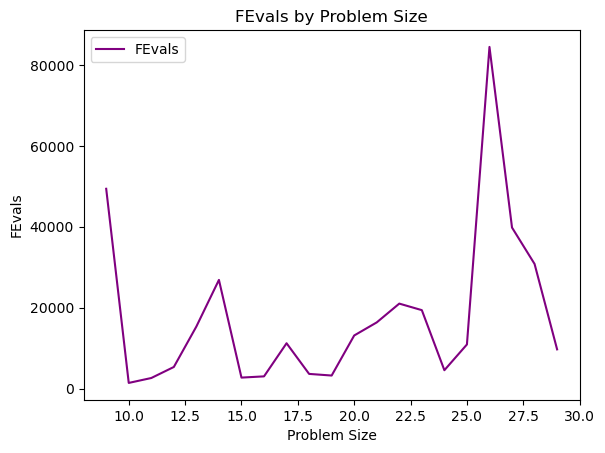

In [46]:
fig, ax = plt.subplots()

ax.plot(df['ProblemSize'], df['FEvals'],
    label = "FEvals", color = 'purple')

legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('FEvals')
plt.title('FEvals by Problem Size')
plt.show()

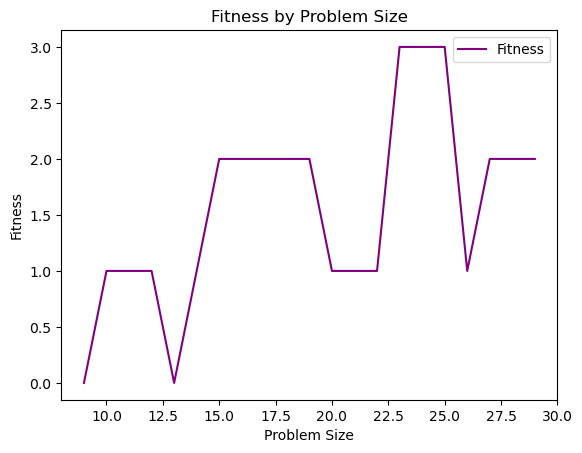

In [47]:
fig, ax = plt.subplots()

ax.plot(df['ProblemSize'], df['Fitness'],
    label = "Fitness", color = 'purple')

legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.title('Fitness by Problem Size')
plt.show()

## MIMIC

In [55]:
problem = QueensGenerator().generate(seed=1, size=8)
m = MIMICRunner(problem=problem,
                experiment_name='queens_mimic',
                seed=1,
                population_sizes=[10,50,100,150,200],
                keep_percent_list=[0.1,0.2,0.3],
                iteration_list=2 ** np.arange(11),
                max_attempts=100,
                generate_curves=True,
                )
stats, curves = m.run()

In [60]:
stats[stats['Keep Percent'] == 0.3]

Iteration  Fitness  FEvals      Time  \
24           0      5.0      10  0.001580   
25           1      4.0      22  0.018898   
26           2      4.0      33  0.035769   
27           4      4.0      55  0.068496   
28           8      4.0      99  0.132587   
29          16      4.0     187  0.261580   
30          32      4.0     363  0.514167   
31          64      4.0     715  1.017654   
32         128      4.0    1122  1.601668   
33         256      4.0    1122  1.601668   
34         512      4.0    1122  1.601668   
35        1024      4.0    1122  1.601668   
60           0      5.0      50  0.006651   
61           1      3.0     102  0.030017   
62           2      3.0     153  0.055139   
63           4      3.0     255  0.103251   
64           8      3.0     459  0.187188   
65          16      3.0     867  0.352988   
66          32      3.0    1683  0.682467   
67          64      3.0    3315  1.336330   
68         128      3.0    5202  2.092375   
69         256      3.0    5202  2.092375   
70         512      3.0    5202  2.092375   
71        1024      3.0    5202  2.092375   
96           0      5.0     100  0.012940   
97           1      2.0     202  0.042779   
98           2      2.0     303  0.074156   
99           4      2.0     505  0.134549   
100          8      2.0     909  0.250419   
101         16      2.0    1717  0.474076   
102         32      2.0    3333  0.902181   
103         64      2.0    6565  1.739007   
104        128      2.0   10302  2.708306   
105        256      2.0   10302  2.708306   
106        512      2.0   10302  2.708306   
107       1024      2.0   10302  2.708306   
132          0      5.0     150  0.019264   
133          1      3.0     302  0.055614   
134          2      2.0     454  0.093611   
135          4      1.0     757  0.167001   
136          8      1.0    1361  0.306315   
137         16      1.0    2569  0.570692   
138         32      1.0    4985  1.097645   
139         64      1.0    9817  2.145840   
140        128      1.0   15706  3.419467   
141        256      1.0   15706  3.419467   
142        512      1.0   15706  3.419467   
143       1024      1.0   15706  3.419467   
168          0      5.0     200  0.025196   
169          1      3.0     402  0.067863   
170          2      2.0     604  0.112615   
171          4      1.0    1007  0.197482   
172          8      1.0    1811  0.362431   
173         16      1.0    3419  0.685618   
174         32      1.0    6635  1.325714   
175         64      1.0   13067  2.604594   
176        128      1.0   20906  4.166644   
177        256      1.0   20906  4.166644   
178        512      1.0   20906  4.166644   
179       1024      1.0   20906  4.166644   

                                        State  use_fast_mimic  \
24                   [5, 3, 4, 0, 7, 1, 3, 5]           False   
25   [7.0, 0.0, 4.0, 1.0, 7.0, 2.0, 7.0, 7.0]           False   
26   [7.0, 0.0, 4.0, 1.0, 7.0, 2.0, 7.0, 7.0]           False   
27   [7.0, 0.0, 4.0, 1.0, 7.0, 2.0, 7.0, 7.0]           False   
28   [7.0, 0.0, 4.0, 1.0, 7.0, 2.0, 7.0, 7.0]           False   
29   [7.0, 0.0, 4.0, 1.0, 7.0, 2.0, 7.0, 7.0]           False   
30   [7.0, 0.0, 4.0, 1.0, 7.0, 2.0, 7.0, 7.0]           False   
31   [7.0, 0.0, 4.0, 1.0, 7.0, 2.0, 7.0, 7.0]           False   
32   [7.0, 0.0, 4.0, 1.0, 7.0, 2.0, 7.0, 7.0]           False   
33   [7.0, 0.0, 4.0, 1.0, 7.0, 2.0, 7.0, 7.0]           False   
34   [7.0, 0.0, 4.0, 1.0, 7.0, 2.0, 7.0, 7.0]           False   
35   [7.0, 0.0, 4.0, 1.0, 7.0, 2.0, 7.0, 7.0]           False   
60                   [5, 3, 4, 0, 7, 1, 3, 5]           False   
61   [3.0, 5.0, 0.0, 3.0, 1.0, 7.0, 5.0, 2.0]           False   
62   [3.0, 5.0, 0.0, 3.0, 1.0, 7.0, 5.0, 2.0]           False   
63   [3.0, 5.0, 0.0, 3.0, 1.0, 7.0, 5.0, 2.0]           False   
64   [3.0, 5.0, 0.0, 3.0, 1.0, 7.0, 5.0, 2.0]           False   
65   [3.0, 5.0, 0.0, 3.0, 1.0, 7.0, 5.0, 2.0]           False   
66   [3.0, 5.0, 0.0, 3.0

In [65]:
fig, ax = plt.subplots()
ax.plot(curves['Iteration'][(curves['Keep Percent'] == 0.3) & (curves['Population Size'] == 150)], curves['Fitness'][(curves['Keep Percent'] == 0.3) & (curves['Population Size'] == 150)],
    label = "Keep Percent = 0.3", color = 'red')
ax.plot(curves['Iteration'][(curves['Keep Percent'] == 0.2) & (curves['Population Size'] == 150)], curves['Fitness'][(curves['Keep Percent'] == 0.2) & (curves['Population Size'] == 150)],
    label = "Keep Percent = 0.2", color = 'blue')
ax.plot(curves['Iteration'][(curves['Keep Percent'] == 0.1) & (curves['Population Size'] == 150)], curves['Fitness'][(curves['Keep Percent'] == 0.1) & (curves['Population Size'] == 150)],
    label = "Keep Percent = 0.1", color = 'green')


legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Fitness by Number of Iterations')
plt.show()

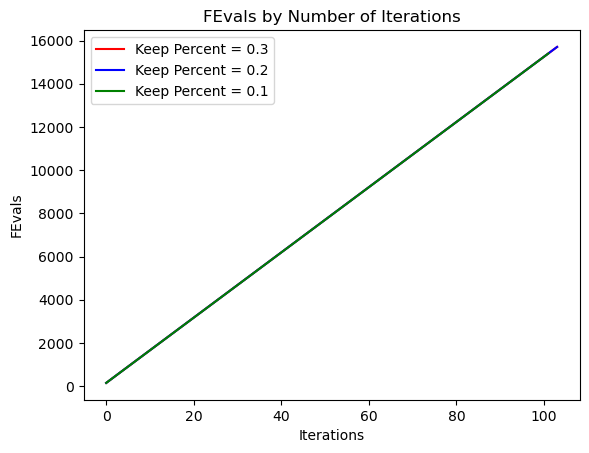

In [66]:
fig, ax = plt.subplots()
ax.plot(curves['Iteration'][(curves['Keep Percent'] == 0.3) & (curves['Population Size'] == 150)], curves['FEvals'][(curves['Keep Percent'] == 0.3) & (curves['Population Size'] == 150)],
    label = "Keep Percent = 0.3", color = 'red')
ax.plot(curves['Iteration'][(curves['Keep Percent'] == 0.2) & (curves['Population Size'] == 150)], curves['FEvals'][(curves['Keep Percent'] == 0.2) & (curves['Population Size'] == 150)],
    label = "Keep Percent = 0.2", color = 'blue')
ax.plot(curves['Iteration'][(curves['Keep Percent'] == 0.1) & (curves['Population Size'] == 150)], curves['FEvals'][(curves['Keep Percent'] == 0.1) & (curves['Population Size'] == 150)],
    label = "Keep Percent = 0.1", color = 'green')


legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('FEvals')
plt.title('FEvals by Number of Iterations')
plt.show()

In [2]:
results = []

for i in np.arange(9,30,1):
    problem = QueensGenerator().generate(seed=1, size=i)
    m = MIMICRunner(problem=problem,
                    experiment_name='queens_mimic',
                    seed=1,
                    population_sizes=[150],
                    keep_percent_list=[0.3],
                    iteration_list=2 ** np.arange(11),
                    max_attempts=100,
                    generate_curves=True,
                    )
    stats, curves = m.run()
    curves['ProblemSize'] = i
    best_fitness = curves['Fitness'].min()
    best_runs = curves[curves['Fitness'] == best_fitness]
    min_evals = best_runs['FEvals'].min()
    best_min_eval = best_runs[best_runs['FEvals'] == min_evals]
    results.append(best_min_eval)

In [3]:
df = results[0]

for result in results[1:]:
    df = pd.concat([df,result])

In [4]:
df

Iteration      Time  Fitness  FEvals  use_fast_mimic  Population Size  \
3           3  0.149032      2.0   605.0           False              150   
5           5  0.263112      2.0   908.0           False              150   
2           2  0.135831      3.0   454.0           False              150   
3           3  0.218503      3.0   606.0           False              150   
10         10  0.734479      2.0  1664.0           False              150   
3           3  0.276940      5.0   605.0           False              150   
8           8  0.759139      3.0  1363.0           False              150   
4           4  0.439790      5.0   758.0           False              150   
5           5  0.597087      5.0   909.0           False              150   
5           5  0.652873      6.0   908.0           False              150   
2           2  0.308652      7.0   454.0           False              150   
5           5  0.781758      7.0   909.0           False              150   
3           3  0.523771      7.0   605.0           False              150   
13         13  2.205648      4.0  2117.0           False              150   
6           6  1.172013      9.0  1059.0           False              150   
2           2  0.452240     11.0   454.0           False              150   
5           5  1.131612     11.0   909.0           False              150   
5           5  1.225889     10.0   909.0           False              150   
5           5  1.303384     13.0   910.0           False              150   
2           2  0.582045     16.0   454.0           False              150   
12         12  3.360147     11.0  1967.0           False              150   

    Keep Percent  max_iters  ProblemSize  
3            0.3       1024            9  
5            0.3       1024           10  
2            0.3       1024           11  
3            0.3       1024           12  
10           0.3       1024           13  
3            0.3       1024           14  
8            0.3       1024           15  
4            0.3       1024           16  
5            0.3       1024           17  
5            0.3       1024           18  
2            0.3       1024           19  
5            0.3       1024           20  
3            0.3       1024           21  
13           0.3       1024           22  
6            0.3       1024           23  
2            0.3       1024           24  
5            0.3       1024           25  
5            0.3       1024           26  
5            0.3       1024           27  
2            0.3       1024           28  
12           0.3       1024           29

In [5]:
fig, ax = plt.subplots()
ax.plot(df['ProblemSize'], df['Fitness'],
    label = "Fitness", color = 'red')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.title('Fitness by Problem Size')
plt.show()

In [8]:
fig, ax = plt.subplots()
ax.plot(df['ProblemSize'], df['FEvals'],
    label = "FEvals", color = 'red')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('FEvals')
plt.title('FEvals by Problem Size')
plt.show()

In [9]:
fig, ax = plt.subplots()
ax.plot(df['ProblemSize'], df['Iteration'],
    label = "Iteration", color = 'red')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Iteration')
plt.title('Iteration by Problem Size')
plt.show()

# Flip Flop

In [24]:
flipflop = mh.FlipFlopGenerator().generate(seed=1, size=8)
print(flipflop.get_state())

[1 1 0 0 1 1 1 1]


In [250]:
fig, ax = plt.subplots()

ax.plot(np.arange(0,256,1), ff_fitnesses, 
        label = "Fitness", color = 'blue')


legend = ax.legend(loc='best')
plt.xlabel('All 8-Bit Strings')
plt.ylabel('Fitness')
plt.title('Fitness for all 8-Bit Strings')
plt.show()

## Simulated Annealing

In [25]:
sa_ff = SARunner(problem=flipflop,
              experiment_name='flipflop_sa',
              output_directory=None,
              seed=1,
              iteration_list=2 ** np.arange(11),
              max_attempts=100,
              temperature_list=[2.0, 1.5, 1.0, 0.75, 0.66, 0.5, 0.1],
              decay_list=[mh.ExpDecay],
              generate_curves=True)
stats_sa_ff, curves_sa_ff = sa_ff.run()

In [26]:
best_fitness_sa_ff = curves_sa_ff['Fitness'].max()
best_runs_sa_ff = curves_sa_ff[curves_sa_ff['Fitness'] == best_fitness_sa_ff]
best_runs_sa_ff.head()

Iteration      Time  Fitness  FEvals Temperature  max_iters
144        144  0.014427      7.0   248.0         2.0       1024
215         70  0.009812      7.0   116.0         1.5       1024
250         34  0.007523      7.0    52.0         1.0       1024
264         13  0.005096      7.0    23.0        0.75       1024
278         13  0.005096      7.0    23.0        0.66       1024

In [27]:
min_evals_sa_ff = best_runs_sa_ff['FEvals'].min()
best_min_eval_sa_ff = best_runs_sa_ff[best_runs_sa_ff['FEvals'] == min_evals_sa_ff]
best_min_eval_sa_ff.head()

Iteration      Time  Fitness  FEvals Temperature  max_iters
264         13  0.005096      7.0    23.0        0.75       1024
278         13  0.005096      7.0    23.0        0.66       1024
292         13  0.005096      7.0    23.0         0.5       1024
306         13  0.005096      7.0    23.0         0.1       1024

In [28]:
stats_sa_ff

Iteration  Fitness  FEvals      Time                     State  \
0           0      2.0       0  0.000091  [1, 1, 0, 0, 1, 1, 1, 1]   
1           1      3.0       2  0.001209  [1, 1, 0, 0, 1, 1, 1, 0]   
2           2      4.0       4  0.002063  [0, 1, 0, 0, 1, 1, 1, 0]   
3           4      2.0       8  0.002980  [1, 1, 0, 0, 1, 1, 1, 1]   
4           8      2.0      16  0.004079  [1, 0, 0, 0, 0, 1, 1, 1]   
..        ...      ...     ...       ...                       ...   
79         64      7.0      23  0.006995  [1, 0, 1, 0, 1, 0, 1, 0]   
80        128      7.0      23  0.006995  [1, 0, 1, 0, 1, 0, 1, 0]   
81        256      7.0      23  0.006995  [1, 0, 1, 0, 1, 0, 1, 0]   
82        512      7.0      23  0.006995  [1, 0, 1, 0, 1, 0, 1, 0]   
83       1024      7.0      23  0.006995  [1, 0, 1, 0, 1, 0, 1, 0]   

   schedule_type  schedule_init_temp  schedule_exp_const  schedule_min_temp  \
0    exponential                 2.0               0.005              0.001   
1    exponential                 2.0               0.005              0.001   
2    exponential                 2.0               0.005              0.001   
3    exponential                 2.0               0.005              0.001   
4    exponential                 2.0               0.005              0.001   
..           ...                 ...                 ...                ...   
79   exponential                 0.1               0.005              0.001   
80   exponential                 0.1               0.005              0.001   
81   exponential                 0.1               0.005              0.001   
82   exponential                 0.1               0.005              0.001   
83   exponential                 0.1               0.005              0.001   

    schedule_current_value Temperature  max_iters  
0                 1.999999         2.0       1024  
1                 1.999988         2.0       1024  
2                 1.999979         2.0       1024  
3                 1.999970         2.0       1024  
4                 1.999959         2.0       1024  
..                     ...         ...        ...  
79                0.099997         0.1       1024  
80                0.099997         0.1       1024  
81                0.099997         0.1       1024  
82                0.099997         0.1       1024  
83                0.099997         0.1       1024  

[84 rows x 12 columns]

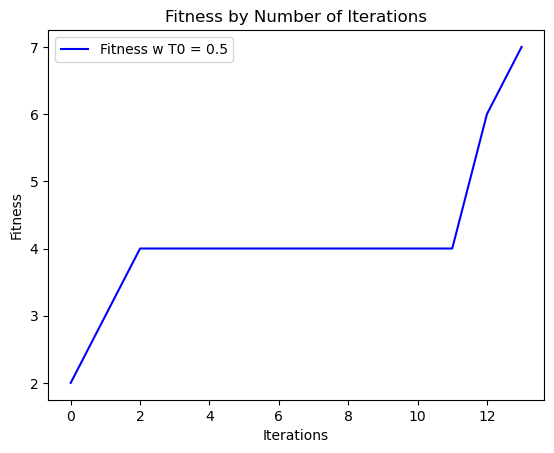

In [29]:
fig, ax = plt.subplots()

ax.plot(curves_sa_ff['Iteration'][curves_sa_ff['Temperature'] == mh.ExpDecay(0.5)], curves_sa_ff['Fitness'][curves_sa_ff['Temperature'] == mh.ExpDecay(0.5)], 
        label = "Fitness w T0 = 0.5", color = 'blue')


legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Fitness by Number of Iterations')
plt.show()

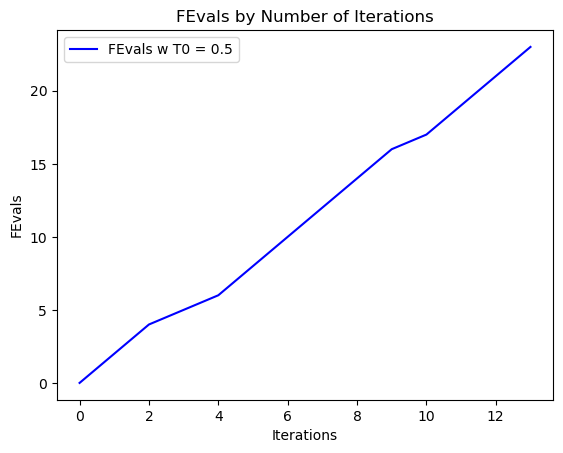

In [30]:
fig, ax = plt.subplots()

ax.plot(curves_sa_ff['Iteration'][curves_sa_ff['Temperature'] == mh.ExpDecay(0.5)], curves_sa_ff['FEvals'][curves_sa_ff['Temperature'] == mh.ExpDecay(0.5)], 
        label = "FEvals w T0 = 0.5", color = 'blue')


legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('FEvals')
plt.title('FEvals by Number of Iterations')
plt.show()

In [31]:
fig, ax = plt.subplots()

ax.plot(curves_sa_ff['Iteration'][curves_sa_ff['Temperature'] == mh.ExpDecay(0.5)], curves_sa_ff['Time'][curves_sa_ff['Temperature'] == mh.ExpDecay(0.5)], 
        label = "Time w T0 = 0.5", color = 'blue')


legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('Time')
plt.title('Time by Number of Iterations')
plt.show()

In [33]:
results_sa_ff = []

for i in np.arange(9,30,1):
    problem = mh.FlipFlopGenerator().generate(seed=1, size=i)
    sa_ff = SARunner(problem=problem,
              experiment_name='flipflop8_sa',
              output_directory=None,
              seed=1,
              iteration_list=2 ** np.arange(11),
              max_attempts=100,
              temperature_list=[0.5],
              decay_list=[mh.ExpDecay],
              generate_curves=True)
    stats_sa_ff, curves_sa_ff = sa_ff.run()
    curves_sa_ff['ProblemSize'] = i
    best_fitness_sa_ff = curves_sa_ff['Fitness'].max()
    best_runs_sa_ff = curves_sa_ff[curves_sa_ff['Fitness'] == best_fitness_sa_ff]
    min_evals_sa_ff = best_runs_sa_ff['FEvals'].min()
    best_min_eval_sa_ff = best_runs_sa_ff[best_runs_sa_ff['FEvals'] == min_evals_sa_ff]
    results_sa_ff.append(best_min_eval_sa_ff)
    

In [34]:
df_sa_ff = results_sa_ff[0]

for result in results_sa_ff[1:]:
    df_sa_ff = pd.concat([df_sa_ff,result])

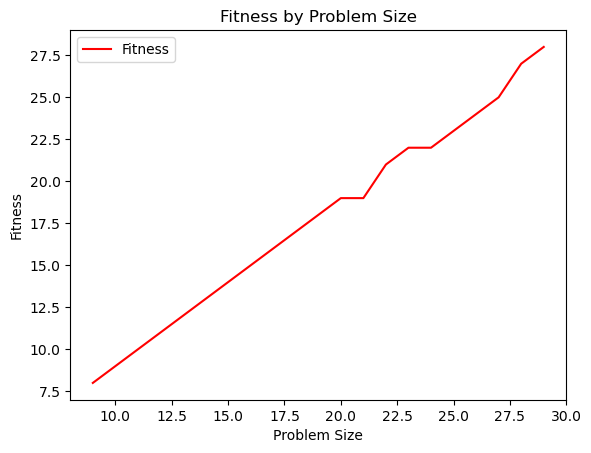

In [36]:
fig, ax = plt.subplots()
ax.plot(df_sa_ff['ProblemSize'], df_sa_ff['Fitness'],
    label = "Fitness", color = 'red')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.title('Fitness by Problem Size')
plt.show()

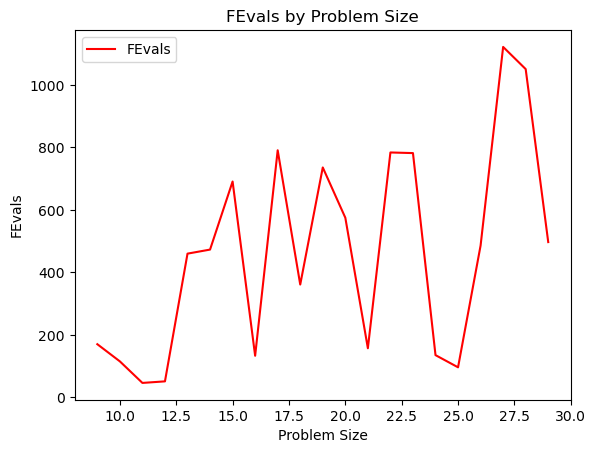

In [37]:
fig, ax = plt.subplots()
ax.plot(df_sa_ff['ProblemSize'], df_sa_ff['FEvals'],
    label = "FEvals", color = 'red')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('FEvals')
plt.title('FEvals by Problem Size')
plt.show()

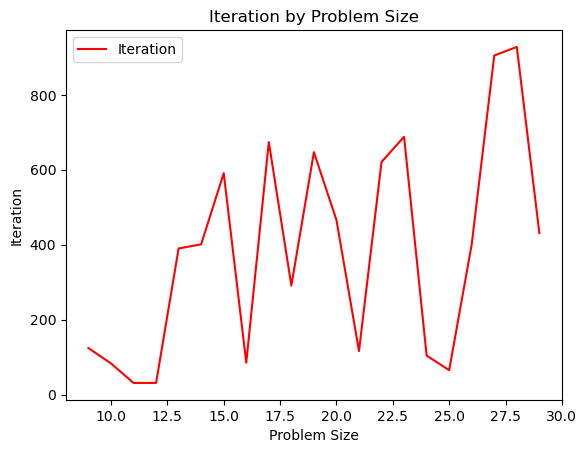

In [38]:
fig, ax = plt.subplots()
ax.plot(df_sa_ff['ProblemSize'], df_sa_ff['Iteration'],
    label = "Iteration", color = 'red')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Iteration')
plt.title('Iteration by Problem Size')
plt.show()

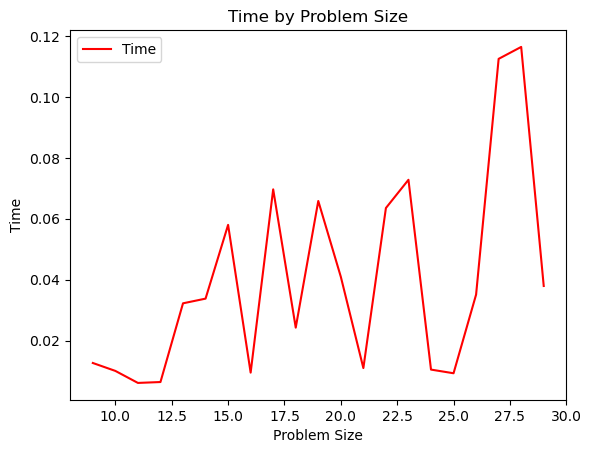

In [39]:
fig, ax = plt.subplots()
ax.plot(df_sa_ff['ProblemSize'], df_sa_ff['Time'],
    label = "Time", color = 'red')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Time')
plt.title('Time by Problem Size')
plt.show()

## Random Hill Climbing

In [40]:
rhc_ff = RHCRunner(problem=flipflop, 
                experiment_name='flipflop8_rhc', 
                seed=1, 
                restart_list=[20], 
                max_attempts=100, 
                generate_curves=True,
                iteration_list=2 ** np.arange(11))
stats_rhc_ff, curves_rhc_ff = rhc_ff.run()

In [41]:
curves_rhc_ff

Iteration      Time  Fitness  FEvals  Restarts  max_iters  \
0             0  0.000111      2.0     0.0        20       1024   
1             1  0.001150      3.0     2.0        20       1024   
2             2  0.001906      4.0     4.0        20       1024   
3             3  0.002858      4.0     5.0        20       1024   
4             4  0.002895      4.0     6.0        20       1024   
...         ...       ...      ...     ...       ...        ...   
1905         11  0.005231      5.0  1938.0        20       1024   
1906         12  0.005269      5.0  1939.0        20       1024   
1907         13  0.005350      5.0  1940.0        20       1024   
1908         14  0.005387      5.0  1941.0        20       1024   
1909         15  0.005412      7.0  1943.0        20       1024   

      current_restart  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
1905               17  
1906               17  
1907               17  
1908               17  
1909               17  

[1910 rows x 7 columns]

In [42]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']

fig, ax = plt.subplots()
for i in np.arange(0,21,1):
    ax.plot(curves_rhc_ff['Iteration'][curves_rhc_ff['current_restart']==i], curves_rhc_ff['Fitness'][curves_rhc_ff['current_restart']==i],
        label = f"restart = {i}", color = colors[i])

plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Fitness by Number of Iterations')
plt.show()

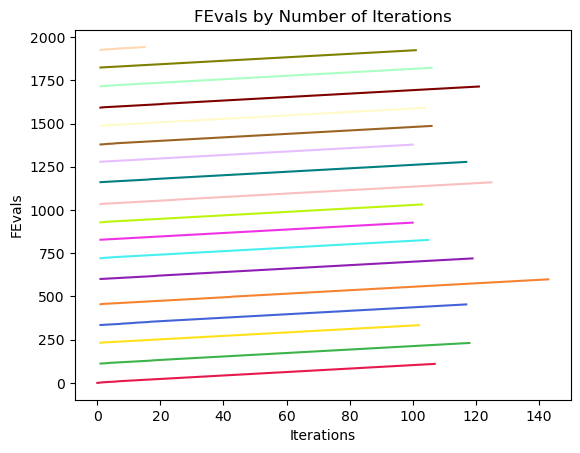

In [43]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']

fig, ax = plt.subplots()
for i in np.arange(0,21,1):
    ax.plot(curves_rhc_ff['Iteration'][curves_rhc_ff['current_restart']==i], curves_rhc_ff['FEvals'][curves_rhc_ff['current_restart']==i],
        label = f"restart = {i}", color = colors[i])

plt.xlabel('Iterations')
plt.ylabel('FEvals')
plt.title('FEvals by Number of Iterations')
plt.show()

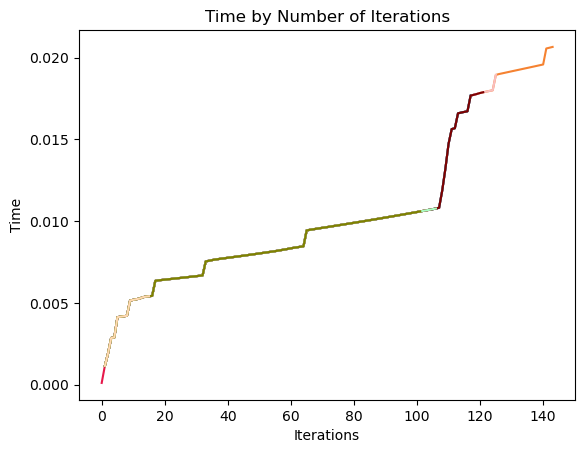

In [44]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']

fig, ax = plt.subplots()
for i in np.arange(0,21,1):
    ax.plot(curves_rhc_ff['Iteration'][curves_rhc_ff['current_restart']==i], curves_rhc_ff['Time'][curves_rhc_ff['current_restart']==i],
        label = f"restart = {i}", color = colors[i])

plt.xlabel('Iterations')
plt.ylabel('Time')
plt.title('Time by Number of Iterations')
plt.show()

In [45]:
results_rhc_ff = []

for i in np.arange(9,30):
    problem = mh.FlipFlopGenerator().generate(seed=1, size=i)
    rhc = RHCRunner(problem=problem, 
                    experiment_name='flipflop_rhc', 
                    seed=1, 
                    restart_list=[20], 
                    max_attempts=100, 
                    generate_curves=True,
                    iteration_list=2 ** np.arange(11))
    stats, curves = rhc.run()
    curves['ProblemSize'] = i
    best_fitness = curves['Fitness'].max()
    best_runs = curves[curves['Fitness'] == best_fitness]
    min_evals = best_runs['FEvals'].min()
    best_min_eval = best_runs[best_runs['FEvals'] == min_evals]
    results_rhc_ff.append(best_min_eval)

In [46]:
df_rhc_ff = results_rhc_ff[0]

for result in results_rhc_ff[1:]:
    df_rhc_ff = pd.concat([df_rhc_ff,result])

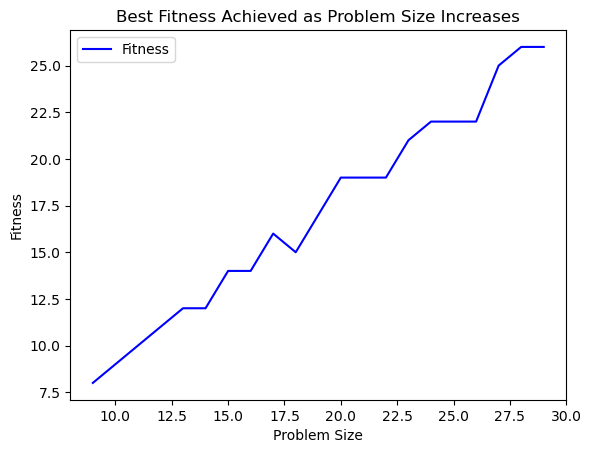

In [47]:
fig, ax = plt.subplots()
ax.plot(df_rhc_ff.ProblemSize, df_rhc_ff.Fitness,
    label = "Fitness", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.title('Best Fitness Achieved as Problem Size Increases')
plt.show()

In [48]:
fig, ax = plt.subplots()
ax.plot(df_rhc_ff.ProblemSize, df_rhc_ff.FEvals,
    label = "FEvals", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('FEvals')
plt.title('# FEvals as Problem Size Increases')
plt.show()

In [49]:
fig, ax = plt.subplots()
ax.plot(df_rhc_ff.ProblemSize, df_rhc_ff.Time,
    label = "Time", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Time')
plt.title('Time as Problem Size Increases')
plt.show()

In [50]:
fig, ax = plt.subplots()
ax.plot(df_rhc_ff.ProblemSize, df_rhc_ff.Iteration,
    label = "Iteration", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Iteration')
plt.title('# Iterations as Problem Size Increases')
plt.show()

## Genetic Algorithm

In [51]:
ga_ff = GARunner(problem=flipflop,
              experiment_name='flipflop_ga',
              iteration_list=2 ** np.arange(11),
              mutation_rates=[0.05],
              population_sizes=[100],
              seed=1,
              generate_curves=True)
stats_ga_ff, curves_ga_ff = ga_ff.run()

In [52]:
curves_ga_ff.shape

(2, 7)

In [53]:
fig, ax = plt.subplots()
ax.plot(curves_ga_ff['Iteration'], curves_ga_ff['Fitness'],
    label = "Mutation Rate = 0.05", color = 'blue')

legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Fitness by Number of Iterations')
plt.show()

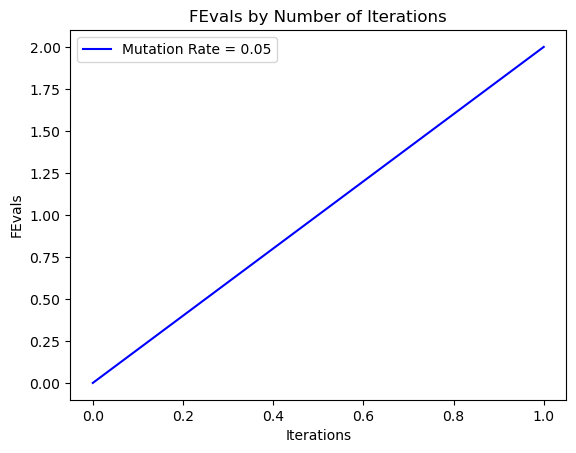

In [54]:
fig, ax = plt.subplots()
ax.plot(curves_ga_ff['Iteration'], curves_ga_ff['FEvals'],
    label = "Mutation Rate = 0.05", color = 'blue')

legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('FEvals')
plt.title('FEvals by Number of Iterations')
plt.show()

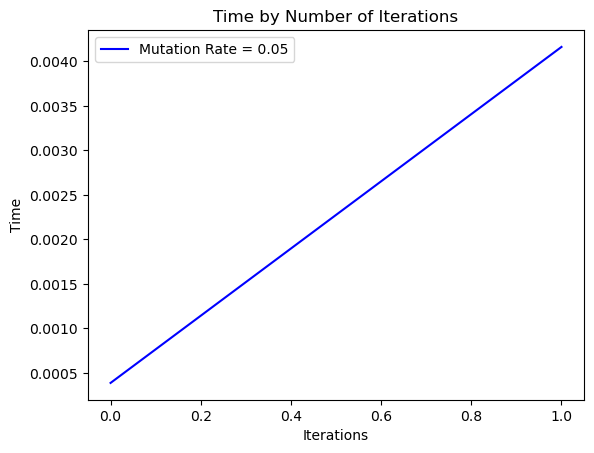

In [55]:
fig, ax = plt.subplots()
ax.plot(curves_ga_ff['Iteration'], curves_ga_ff['Time'],
    label = "Mutation Rate = 0.05", color = 'blue')

legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('Time')
plt.title('Time by Number of Iterations')
plt.show()

In [125]:
results_ga_ff = []

for i in np.arange(9,30):
    problem = mh.FlipFlopGenerator().generate(seed=1, size=i)
    ga = GARunner(problem=problem,
              experiment_name='flipflop_ga',
              iteration_list=2 ** np.arange(11),
              mutation_rates=[0.05],
              population_sizes=[100],
              seed=1,
              generate_curves=True)
    stats, curves = ga.run()
    curves['ProblemSize'] = i
    best_fitness = curves['Fitness'].max()
    best_runs = curves[curves['Fitness'] == best_fitness]
    min_evals = best_runs['FEvals'].min()
    best_min_eval = best_runs[best_runs['FEvals'] == min_evals]
    results_ga_ff.append(best_min_eval)

In [126]:
df_ga_ff = results_ga_ff[0]

for result in results_ga_ff[1:]:
    df_ga_ff = pd.concat([df_ga_ff,result])

In [127]:
df_ga_ff

Iteration      Time  Fitness  FEvals  Population Size  Mutation Rate  \
6           6  0.019116      8.0     8.0              100           0.05   
1           1  0.003375      9.0     2.0              100           0.05   
7           7  0.020762     10.0     9.0              100           0.05   
1           1  0.003338     11.0     2.0              100           0.05   
3           3  0.009859     12.0     5.0              100           0.05   
3           3  0.009933     13.0     5.0              100           0.05   
5           5  0.016058     14.0     7.0              100           0.05   
6           6  0.018301     15.0     9.0              100           0.05   
8           8  0.023096     16.0    12.0              100           0.05   
10         10  0.028957     17.0    14.0              100           0.05   
10         10  0.029170     18.0    15.0              100           0.05   
12         12  0.034724     19.0    16.0              100           0.05   
9           9  0.026652     20.0    13.0              100           0.05   
7           7  0.020897     20.0    10.0              100           0.05   
6           6  0.018564     20.0     9.0              100           0.05   
12         12  0.034410     22.0    17.0              100           0.05   
13         13  0.037064     23.0    18.0              100           0.05   
10         10  0.029769     24.0    14.0              100           0.05   
23         23  0.062889     26.0    29.0              100           0.05   
19         19  0.053064     27.0    25.0              100           0.05   
13         13  0.037278     28.0    22.0              100           0.05   

    max_iters  ProblemSize  
6        1024            9  
1        1024           10  
7        1024           11  
1        1024           12  
3        1024           13  
3        1024           14  
5        1024           15  
6        1024           16  
8        1024           17  
10       1024           18  
10       1024           19  
12       1024           20  
9        1024           21  
7        1024           22  
6        1024           23  
12       1024           24  
13       1024           25  
10       1024           26  
23       1024           27  
19       1024           28  
13       1024           29

In [128]:
fig, ax = plt.subplots()
ax.plot(df_ga_ff.ProblemSize, df_ga_ff.Fitness,
    label = "Fitness", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.title('Best Fitness Achieved as Problem Size Increases')
plt.show()

In [129]:
fig, ax = plt.subplots()
ax.plot(df_ga_ff.ProblemSize, df_ga_ff.FEvals,
    label = "FEvals", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('FEvals')
plt.title('# FEvals as Problem Size Increases')
plt.show()

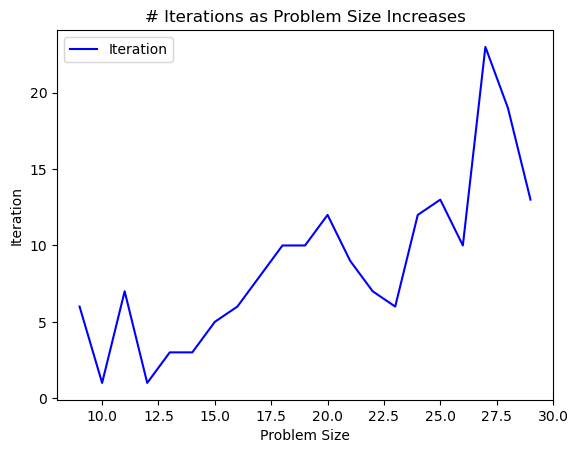

In [130]:
fig, ax = plt.subplots()
ax.plot(df_ga_ff.ProblemSize, df_ga_ff.Iteration,
    label = "Iteration", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Iteration')
plt.title('# Iterations as Problem Size Increases')
plt.show()

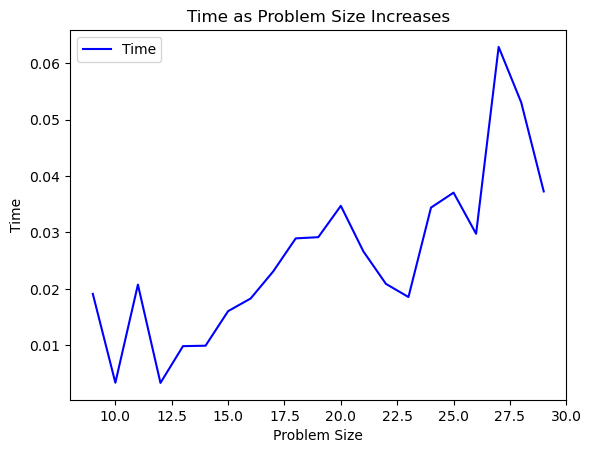

In [131]:
fig, ax = plt.subplots()
ax.plot(df_ga_ff.ProblemSize, df_ga_ff.Time,
    label = "Time", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Time')
plt.title('Time as Problem Size Increases')
plt.show()

In [63]:
m_ff = MIMICRunner(problem=flipflop,
                experiment_name='flipflop_mimic',
                seed=1,
                population_sizes=[100],
                keep_percent_list=[0.3],
                iteration_list=2 ** np.arange(11),
                max_attempts=100,
                generate_curves=True,
                )
stats_m_ff, curves_m_ff = m_ff.run()

In [64]:
fig, ax = plt.subplots()
ax.plot(curves_m_ff['Iteration'], curves_m_ff['Fitness'],
    label = "Fitness", color = 'blue')

legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Fitness by Number of Iterations')
plt.show()

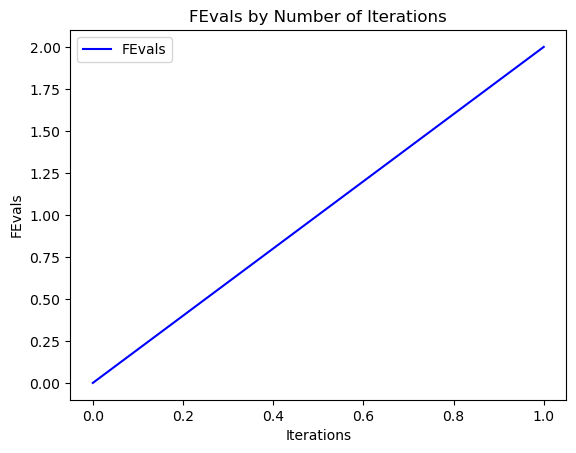

In [65]:
fig, ax = plt.subplots()
ax.plot(curves_m_ff['Iteration'], curves_m_ff['FEvals'],
    label = "FEvals", color = 'blue')

legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('FEvals')
plt.title('FEvals by Number of Iterations')
plt.show()

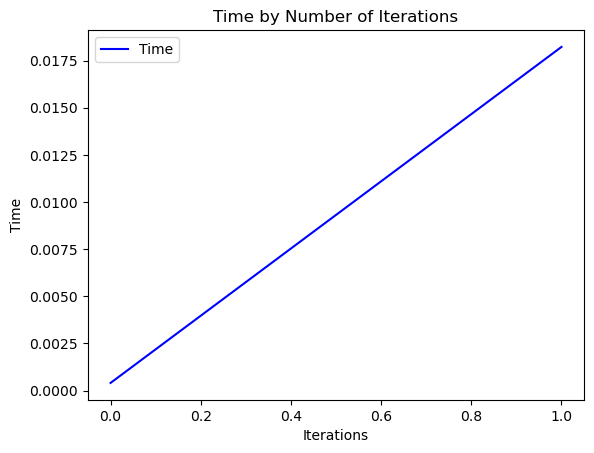

In [66]:
fig, ax = plt.subplots()
ax.plot(curves_m_ff['Iteration'], curves_m_ff['Time'],
    label = "Time", color = 'blue')

legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('Time')
plt.title('Time by Number of Iterations')
plt.show()

In [16]:
results_m_ff = []

for i in np.arange(9,30):
    problem = mh.FlipFlopGenerator().generate(seed=1, size=i)
    m = MIMICRunner(problem=problem,
                experiment_name='flipflop_mimic',
                seed=1,
                population_sizes=[100],
                keep_percent_list=[0.3],
                iteration_list=2 ** np.arange(11),
                max_attempts=100,
                generate_curves=True,
                )
    stats, curves = m.run()
    curves['ProblemSize'] = i
    best_fitness = curves['Fitness'].max()
    best_runs = curves[curves['Fitness'] == best_fitness]
    min_evals = best_runs['FEvals'].min()
    best_min_eval = best_runs[best_runs['FEvals'] == min_evals]
    results_m_ff.append(best_min_eval)

In [17]:
df_m_ff = results_m_ff[0]

for result in results_m_ff[1:]:
    df_m_ff = pd.concat([df_m_ff,result])

In [18]:
df_m_ff

Iteration      Time  Fitness  FEvals  use_fast_mimic  Population Size  \
1          1  0.020898      8.0     2.0           False              100   
1          1  0.023753      9.0     2.0           False              100   
2          2  0.057442     10.0     4.0           False              100   
1          1  0.033596     11.0     2.0           False              100   
2          2  0.080715     12.0     4.0           False              100   
1          1  0.045824     13.0     2.0           False              100   
3          3  0.157204     14.0     6.0           False              100   
2          2  0.119801     15.0     4.0           False              100   
2          2  0.134993     16.0     4.0           False              100   
5          5  0.392881     17.0     8.0           False              100   
5          5  0.418026     18.0     8.0           False              100   
3          3  0.283322     18.0     6.0           False              100   
2          2  0.206553     18.0     4.0           False              100   
5          5  0.566826     21.0     8.0           False              100   
7          7  0.854370     21.0    12.0           False              100   
5          5  0.667886     23.0     8.0           False              100   
5          5  0.722624     23.0     8.0           False              100   
6          6  0.935793     24.0    10.0           False              100   
3          3  0.506577     23.0     6.0           False              100   
5          5  0.907912     25.0    10.0           False              100   
6          6  1.168296     26.0    11.0           False              100   

   Keep Percent  max_iters  ProblemSize  
1           0.3       1024            9  
1           0.3       1024           10  
2           0.3       1024           11  
1           0.3       1024           12  
2           0.3       1024           13  
1           0.3       1024           14  
3           0.3       1024           15  
2           0.3       1024           16  
2           0.3       1024           17  
5           0.3       1024           18  
5           0.3       1024           19  
3           0.3       1024           20  
2           0.3       1024           21  
5           0.3       1024           22  
7           0.3       1024           23  
5           0.3       1024           24  
5           0.3       1024           25  
6           0.3       1024           26  
3           0.3       1024           27  
5           0.3       1024           28  
6           0.3       1024           29

In [20]:
fig, ax = plt.subplots()
ax.plot(df_m_ff.ProblemSize, df_m_ff.Fitness,
    label = "Fitness", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.title('Fitness as Problem Size Increases')
plt.show()

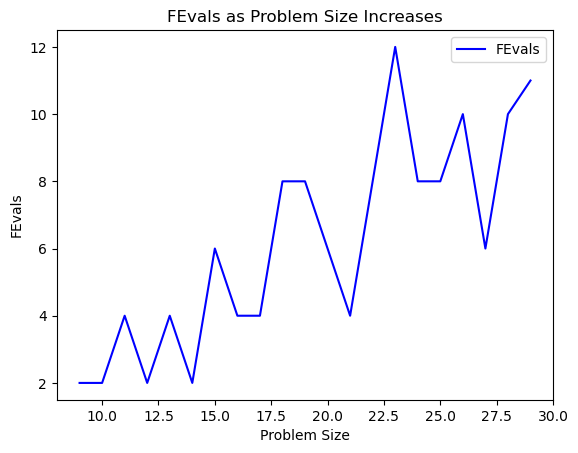

In [21]:
fig, ax = plt.subplots()
ax.plot(df_m_ff.ProblemSize, df_m_ff.FEvals,
    label = "FEvals", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('FEvals')
plt.title('FEvals as Problem Size Increases')
plt.show()

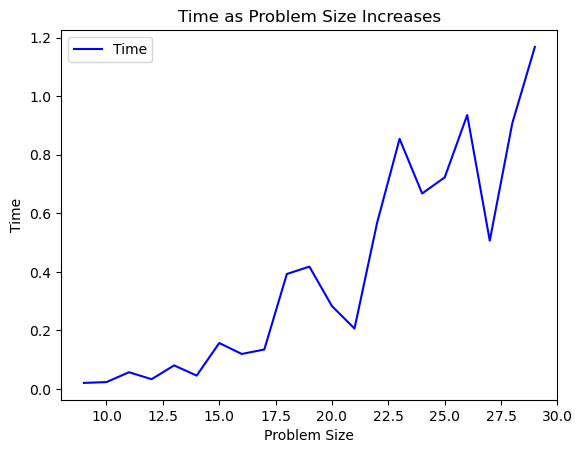

In [22]:
fig, ax = plt.subplots()
ax.plot(df_m_ff.ProblemSize, df_m_ff.Time,
    label = "Time", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Time')
plt.title('Time as Problem Size Increases')
plt.show()

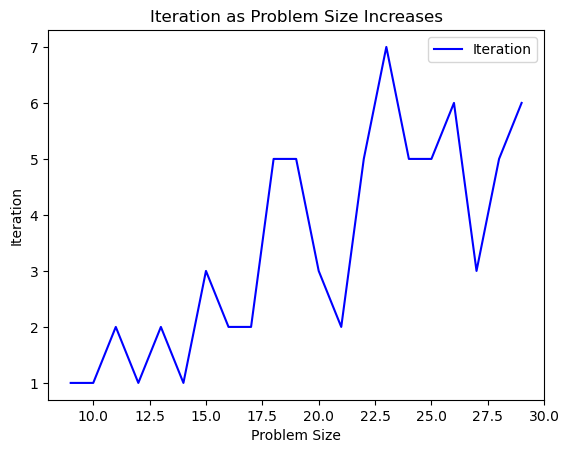

In [23]:
fig, ax = plt.subplots()
ax.plot(df_m_ff.ProblemSize, df_m_ff.Iteration,
    label = "Iteration", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Iteration')
plt.title('Iteration as Problem Size Increases')
plt.show()

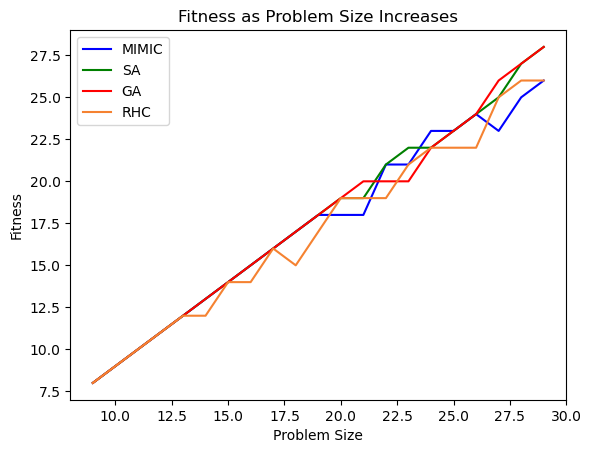

In [132]:
fig, ax = plt.subplots()
ax.plot(df_m_ff.ProblemSize, df_m_ff.Fitness,
    label = "MIMIC", color = 'b')
ax.plot(df_sa_ff.ProblemSize, df_sa_ff.Fitness,
    label = "SA", color = 'g')
ax.plot(df_ga_ff.ProblemSize, df_ga_ff.Fitness,
    label = "GA", color = 'r')
ax.plot(df_rhc_ff.ProblemSize, df_rhc_ff.Fitness,
    label = "RHC", color = '#f58231')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.title('Fitness as Problem Size Increases')
plt.show()

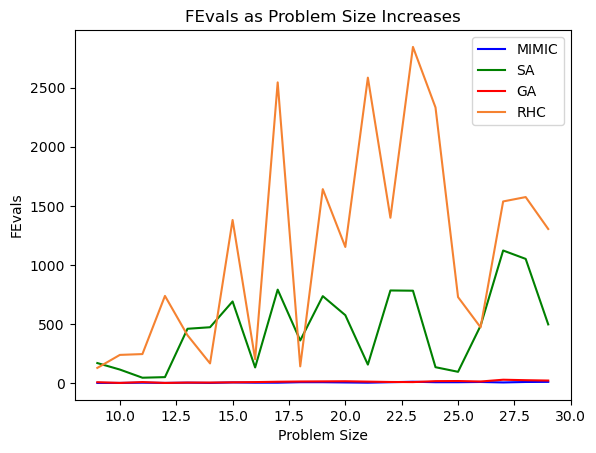

In [134]:
fig, ax = plt.subplots()
ax.plot(df_m_ff.ProblemSize, df_m_ff.FEvals,
    label = "MIMIC", color = 'b')
ax.plot(df_sa_ff.ProblemSize, df_sa_ff.FEvals,
    label = "SA", color = 'g')
ax.plot(df_ga_ff.ProblemSize, df_ga_ff.FEvals,
    label = "GA", color = 'r')
ax.plot(df_rhc_ff.ProblemSize, df_rhc_ff.FEvals,
    label = "RHC", color = '#f58231')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('FEvals')
plt.title('FEvals as Problem Size Increases')
plt.show()

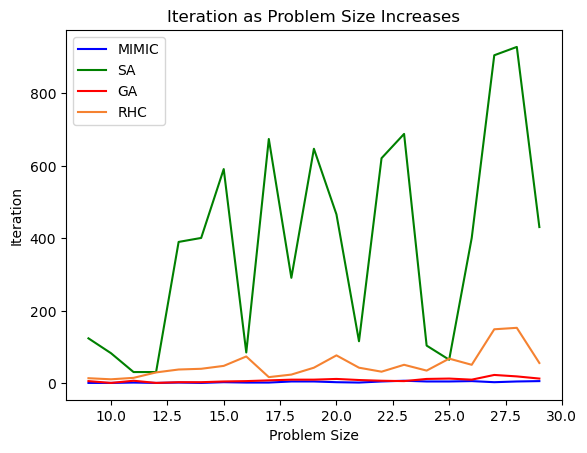

In [135]:
fig, ax = plt.subplots()
ax.plot(df_m_ff.ProblemSize, df_m_ff.Iteration,
    label = "MIMIC", color = 'b')
ax.plot(df_sa_ff.ProblemSize, df_sa_ff.Iteration,
    label = "SA", color = 'g')
ax.plot(df_ga_ff.ProblemSize, df_ga_ff.Iteration,
    label = "GA", color = 'r')
ax.plot(df_rhc_ff.ProblemSize, df_rhc_ff.Iteration,
    label = "RHC", color = '#f58231')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Iteration')
plt.title('Iteration as Problem Size Increases')
plt.show()

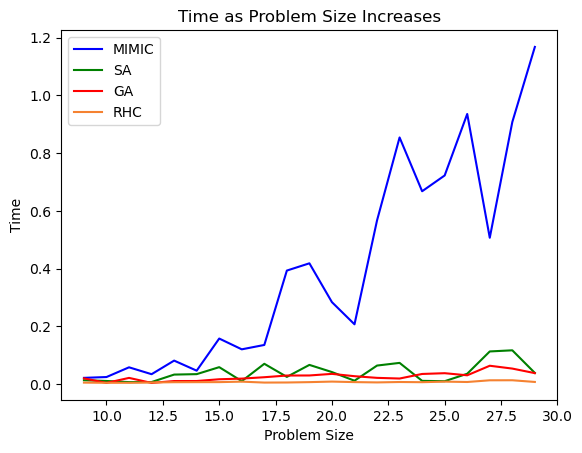

In [136]:
fig, ax = plt.subplots()
ax.plot(df_m_ff.ProblemSize, df_m_ff.Time,
    label = "MIMIC", color = 'b')
ax.plot(df_sa_ff.ProblemSize, df_sa_ff.Time,
    label = "SA", color = 'g')
ax.plot(df_ga_ff.ProblemSize, df_ga_ff.Time,
    label = "GA", color = 'r')
ax.plot(df_rhc_ff.ProblemSize, df_rhc_ff.Time,
    label = "RHC", color = '#f58231')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Time')
plt.title('Time as Problem Size Increases')
plt.show()

# Continuous Peaks

In [263]:
cp = mh.ContinuousPeaksGenerator.generate(seed=1, size=8)
print(cp.get_state())

[0 0 0 0 0 0 0 0]


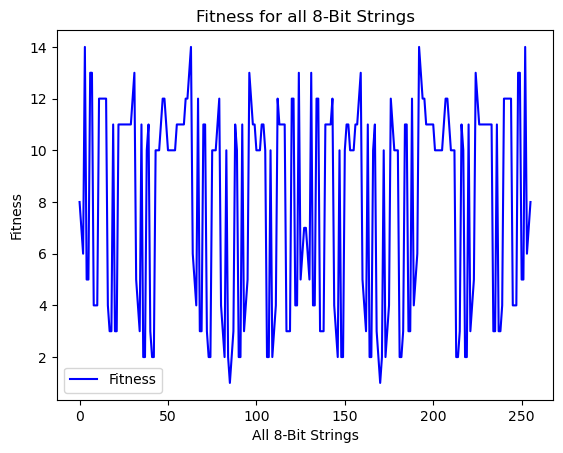

In [261]:
fig, ax = plt.subplots()

ax.plot(np.arange(0,256,1), cp_fitnesses, 
        label = "Fitness", color = 'blue')


legend = ax.legend(loc='best')
plt.xlabel('All 8-Bit Strings')
plt.ylabel('Fitness')
plt.title('Fitness for all 8-Bit Strings')
plt.show()

## Simulated Annealing

In [87]:
sa_cp = SARunner(problem=cp,
              experiment_name='cp_sa',
              output_directory=None,
              seed=1,
              iteration_list=2 ** np.arange(11),
              max_attempts=100,
              temperature_list=[0.5],
              decay_list=[mh.ExpDecay],
              generate_curves=True)
stats_sa_cp, curves_sa_cp = sa_cp.run()

In [88]:
best_fitness_sa_cp = curves_sa_cp['Fitness'].max()
best_runs_sa_cp = curves_sa_cp[curves_sa_cp['Fitness'] == best_fitness_sa_cp]
best_runs_sa_cp.head()

Iteration      Time  Fitness  FEvals Temperature  max_iters
27         27  0.006292     14.0    39.0         0.5       1024
28         28  0.006320     14.0    40.0         0.5       1024
29         29  0.006348     14.0    41.0         0.5       1024
30         30  0.006379     14.0    42.0         0.5       1024
31         31  0.006411     14.0    43.0         0.5       1024

In [89]:
min_evals_sa_cp = best_runs_sa_cp['FEvals'].min()
best_min_eval_sa_cp = best_runs_sa_cp[best_runs_sa_cp['FEvals'] == min_evals_sa_cp]
best_min_eval_sa_cp.head()

Iteration      Time  Fitness  FEvals Temperature  max_iters
27         27  0.006292     14.0    39.0         0.5       1024

In [90]:
stats_sa_cp

Iteration  Fitness  FEvals      Time                     State  \
0           0     12.0       0  0.000083  [1, 1, 0, 0, 1, 1, 1, 1]   
1           1     12.0       1  0.001180  [1, 1, 0, 0, 1, 1, 1, 1]   
2           2     12.0       3  0.002149  [1, 0, 0, 0, 1, 1, 1, 1]   
3           4     12.0       6  0.003043  [1, 1, 0, 0, 1, 1, 1, 1]   
4           8     12.0      10  0.003970  [1, 1, 0, 0, 1, 1, 1, 1]   
5          16     11.0      24  0.005063  [0, 1, 0, 0, 1, 1, 1, 0]   
6          32     14.0      44  0.006439  [0, 0, 1, 1, 1, 1, 1, 1]   
7          64     14.0      76  0.008556  [0, 0, 1, 1, 1, 1, 1, 1]   
8         128     14.0     146  0.012299  [0, 0, 1, 1, 1, 1, 1, 1]   
9         256     14.0     215  0.017310  [0, 0, 1, 1, 1, 1, 1, 1]   
10        512     14.0     215  0.017310  [0, 0, 1, 1, 1, 1, 1, 1]   
11       1024     14.0     215  0.017310  [0, 0, 1, 1, 1, 1, 1, 1]   

   schedule_type  schedule_init_temp  schedule_exp_const  schedule_min_temp  \
0    exponential                 0.5               0.005              0.001   
1    exponential                 0.5               0.005              0.001   
2    exponential                 0.5               0.005              0.001   
3    exponential                 0.5               0.005              0.001   
4    exponential                 0.5               0.005              0.001   
5    exponential                 0.5               0.005              0.001   
6    exponential                 0.5               0.005              0.001   
7    exponential                 0.5               0.005              0.001   
8    exponential                 0.5               0.005              0.001   
9    exponential                 0.5               0.005              0.001   
10   exponential                 0.5               0.005              0.001   
11   exponential                 0.5               0.005              0.001   

    schedule_current_value Temperature  max_iters  
0                 0.500000         0.5       1024  
1                 0.499997         0.5       1024  
2                 0.499995         0.5       1024  
3                 0.499992         0.5       1024  
4                 0.499990         0.5       1024  
5                 0.499987         0.5       1024  
6                 0.499984         0.5       1024  
7                 0.499979         0.5       1024  
8                 0.499969         0.5       1024  
9                 0.499957         0.5       1024  
10                0.499957         0.5       1024  
11                0.499957         0.5       1024

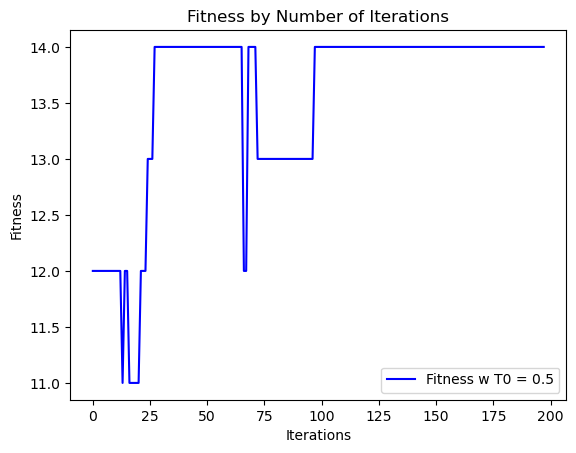

In [91]:
fig, ax = plt.subplots()

ax.plot(curves_sa_cp['Iteration'][curves_sa_cp['Temperature'] == mh.ExpDecay(0.5)], curves_sa_cp['Fitness'][curves_sa_cp['Temperature'] == mh.ExpDecay(0.5)], 
        label = "Fitness w T0 = 0.5", color = 'blue')


legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Fitness by Number of Iterations')
plt.show()

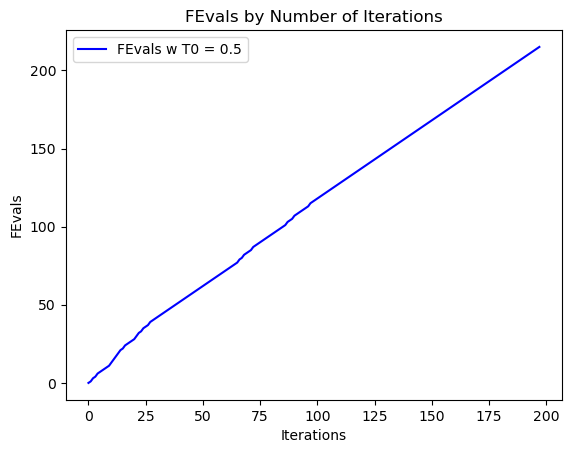

In [92]:
fig, ax = plt.subplots()

ax.plot(curves_sa_cp['Iteration'][curves_sa_cp['Temperature'] == mh.ExpDecay(0.5)], curves_sa_cp['FEvals'][curves_sa_cp['Temperature'] == mh.ExpDecay(0.5)], 
        label = "FEvals w T0 = 0.5", color = 'blue')


legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('FEvals')
plt.title('FEvals by Number of Iterations')
plt.show()

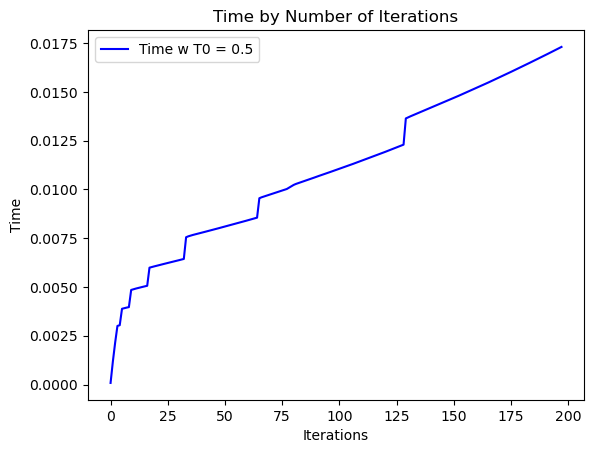

In [93]:
fig, ax = plt.subplots()

ax.plot(curves_sa_cp['Iteration'][curves_sa_cp['Temperature'] == mh.ExpDecay(0.5)], curves_sa_cp['Time'][curves_sa_cp['Temperature'] == mh.ExpDecay(0.5)], 
        label = "Time w T0 = 0.5", color = 'blue')


legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('Time')
plt.title('Time by Number of Iterations')
plt.show()

In [101]:
results_sa_cp = []

for i in np.arange(9,30,1):
    problem = mh.ContinuousPeaksGenerator.generate(seed=1, size=i)
    sa_cp = SARunner(problem=problem,
              experiment_name='cp_sa',
              output_directory=None,
              seed=1,
              iteration_list=2 ** np.arange(11),
              max_attempts=100,
              temperature_list=[0.5],
              decay_list=[mh.ExpDecay],
              generate_curves=True)
    stats_sa_cp, curves_sa_cp = sa_cp.run()
    curves_sa_cp['ProblemSize'] = i
    best_fitness_sa_cp = curves_sa_cp['Fitness'].max()
    best_runs_sa_cp = curves_sa_cp[curves_sa_cp['Fitness'] == best_fitness_sa_cp]
    min_evals_sa_cp = best_runs_sa_cp['FEvals'].min()
    best_min_eval_sa_cp = best_runs_sa_cp[best_runs_sa_cp['FEvals'] == min_evals_sa_cp]
    results_sa_cp.append(best_min_eval_sa_cp)
    

In [102]:
df_sa_cp = results_sa_cp[0]

for result in results_sa_cp[1:]:
    df_sa_cp = pd.concat([df_sa_cp,result])

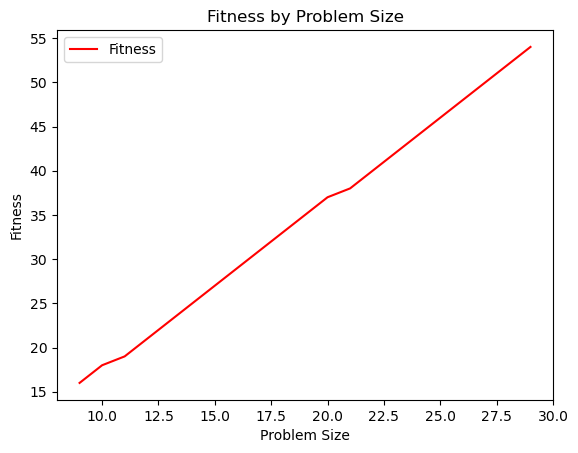

In [103]:
fig, ax = plt.subplots()
ax.plot(df_sa_cp['ProblemSize'], df_sa_cp['Fitness'],
    label = "Fitness", color = 'red')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.title('Fitness by Problem Size')
plt.show()

In [104]:
fig, ax = plt.subplots()
ax.plot(df_sa_cp['ProblemSize'], df_sa_cp['FEvals'],
    label = "FEvals", color = 'red')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('FEvals')
plt.title('FEvals by Problem Size')
plt.show()

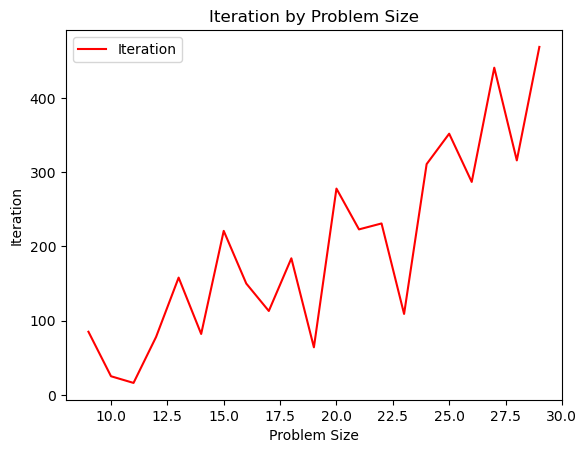

In [105]:
fig, ax = plt.subplots()
ax.plot(df_sa_cp['ProblemSize'], df_sa_cp['Iteration'],
    label = "Iteration", color = 'red')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Iteration')
plt.title('Iteration by Problem Size')
plt.show()

In [106]:
fig, ax = plt.subplots()
ax.plot(df_sa_cp['ProblemSize'], df_sa_cp['Time'],
    label = "Time", color = 'red')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Time')
plt.title('Time by Problem Size')
plt.show()

## Random Hill Climbing

In [107]:
rhc_cp = RHCRunner(problem=cp, 
                experiment_name='cp_rhc', 
                seed=1, 
                restart_list=[20], 
                max_attempts=100, 
                generate_curves=True,
                iteration_list=2 ** np.arange(11))
stats_rhc_cp, curves_rhc_cp = rhc_cp.run()

In [108]:
curves_rhc_cp

Iteration      Time  Fitness  FEvals  Restarts  max_iters  \
0             0  0.000091     12.0     0.0        20       1024   
1             1  0.001093     12.0     1.0        20       1024   
2             2  0.001837     12.0     2.0        20       1024   
3             3  0.002565     12.0     3.0        20       1024   
4             4  0.002590     12.0     4.0        20       1024   
...         ...       ...      ...     ...       ...        ...   
2280        109  0.015391     14.0  2315.0        20       1024   
2281        110  0.016296     14.0  2316.0        20       1024   
2282        111  0.016340     14.0  2317.0        20       1024   
2283        112  0.016379     14.0  2318.0        20       1024   
2284        113  0.016416     14.0  2319.0        20       1024   

      current_restart  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
2280               20  
2281               20  
2282               20  
2283               20  
2284               20  

[2285 rows x 7 columns]

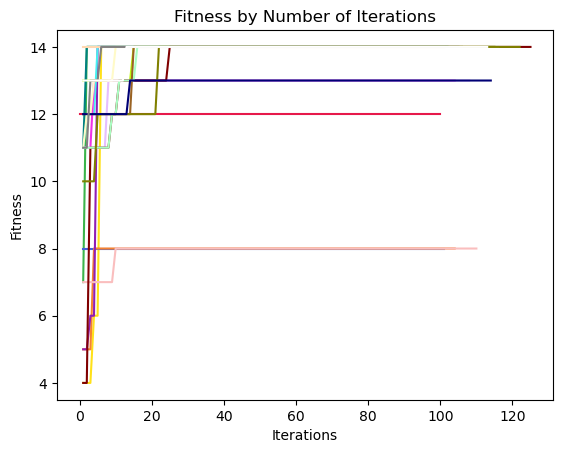

In [109]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']

fig, ax = plt.subplots()
for i in np.arange(0,21,1):
    ax.plot(curves_rhc_cp['Iteration'][curves_rhc_cp['current_restart']==i], curves_rhc_cp['Fitness'][curves_rhc_cp['current_restart']==i],
        label = f"restart = {i}", color = colors[i])

plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Fitness by Number of Iterations')
plt.show()

In [110]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']

fig, ax = plt.subplots()
for i in np.arange(0,21,1):
    ax.plot(curves_rhc_cp['Iteration'][curves_rhc_cp['current_restart']==i], curves_rhc_cp['FEvals'][curves_rhc_cp['current_restart']==i],
        label = f"restart = {i}", color = colors[i])

plt.xlabel('Iterations')
plt.ylabel('FEvals')
plt.title('FEvals by Number of Iterations')
plt.show()

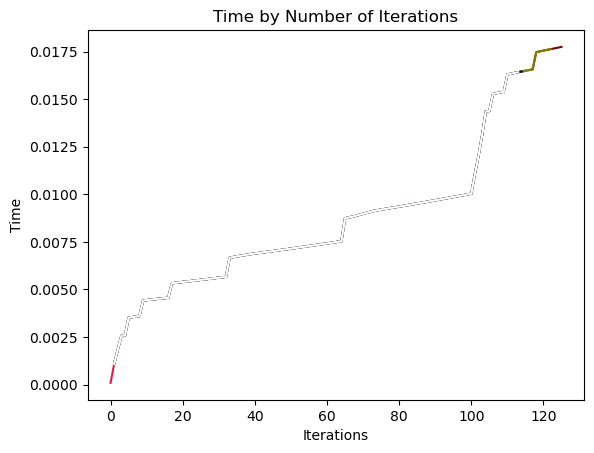

In [111]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']

fig, ax = plt.subplots()
for i in np.arange(0,21,1):
    ax.plot(curves_rhc_cp['Iteration'][curves_rhc_cp['current_restart']==i], curves_rhc_cp['Time'][curves_rhc_cp['current_restart']==i],
        label = f"restart = {i}", color = colors[i])

plt.xlabel('Iterations')
plt.ylabel('Time')
plt.title('Time by Number of Iterations')
plt.show()

In [112]:
results_rhc_cp = []

for i in np.arange(9,30):
    problem = mh.ContinuousPeaksGenerator.generate(seed=1, size=i)
    rhc = RHCRunner(problem=problem, 
                    experiment_name='cp_rhc', 
                    seed=1, 
                    restart_list=[20], 
                    max_attempts=100, 
                    generate_curves=True,
                    iteration_list=2 ** np.arange(11))
    stats, curves = rhc.run()
    curves['ProblemSize'] = i
    best_fitness = curves['Fitness'].max()
    best_runs = curves[curves['Fitness'] == best_fitness]
    min_evals = best_runs['FEvals'].min()
    best_min_eval = best_runs[best_runs['FEvals'] == min_evals]
    results_rhc_cp.append(best_min_eval)

In [113]:
df_rhc_cp = results_rhc_cp[0]

for result in results_rhc_cp[1:]:
    df_rhc_cp = pd.concat([df_rhc_cp,result])

In [114]:
fig, ax = plt.subplots()
ax.plot(df_rhc_cp.ProblemSize, df_rhc_cp.Fitness,
    label = "Fitness", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.title('Best Fitness Achieved as Problem Size Increases')
plt.show()

In [115]:
fig, ax = plt.subplots()
ax.plot(df_rhc_cp.ProblemSize, df_rhc_cp.FEvals,
    label = "FEvals", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('FEvals')
plt.title('# FEvals as Problem Size Increases')
plt.show()

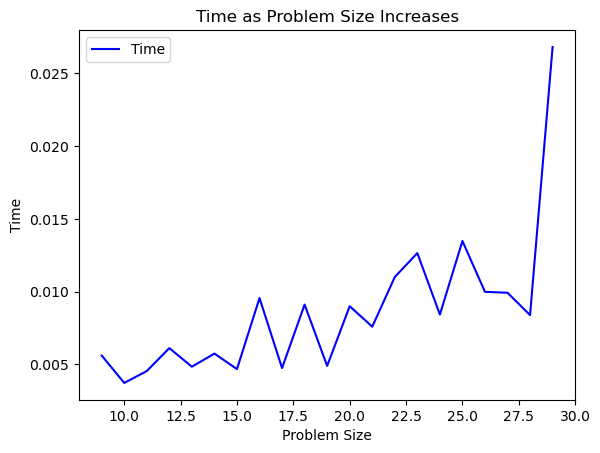

In [116]:
fig, ax = plt.subplots()
ax.plot(df_rhc_cp.ProblemSize, df_rhc_cp.Time,
    label = "Time", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Time')
plt.title('Time as Problem Size Increases')
plt.show()

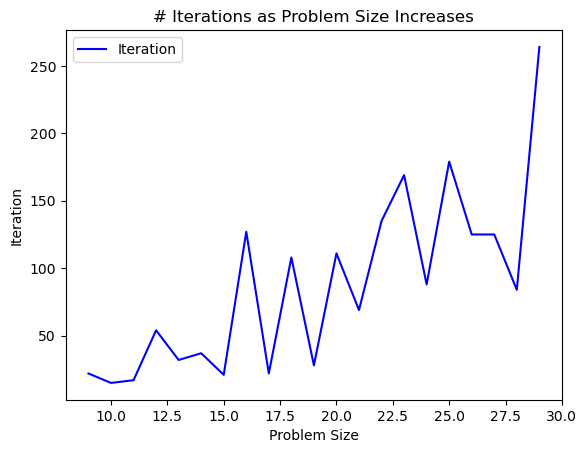

In [117]:
fig, ax = plt.subplots()
ax.plot(df_rhc_cp.ProblemSize, df_rhc_cp.Iteration,
    label = "Iteration", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Iteration')
plt.title('# Iterations as Problem Size Increases')
plt.show()

## Genetic Algorithm

In [120]:
ga_cp = GARunner(problem=cp,
              experiment_name='cp_ga',
              iteration_list=2 ** np.arange(11),
              mutation_rates=[0.05],
              population_sizes=[100],
              seed=1,
              generate_curves=True)
stats_ga_cp, curves_ga_cp = ga_cp.run()

In [121]:
curves_ga_cp.shape

(502, 7)

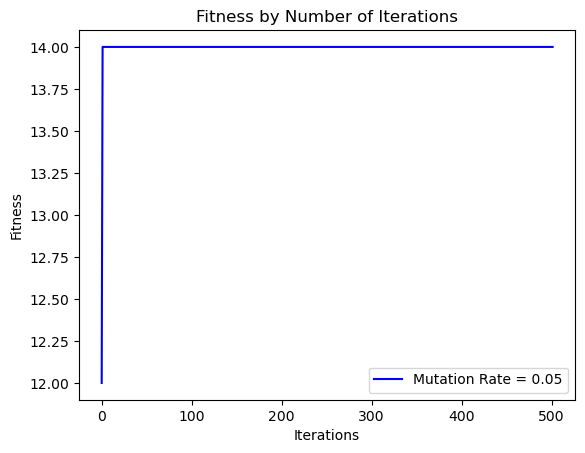

In [122]:
fig, ax = plt.subplots()
ax.plot(curves_ga_cp['Iteration'], curves_ga_cp['Fitness'],
    label = "Mutation Rate = 0.05", color = 'blue')

legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Fitness by Number of Iterations')
plt.show()

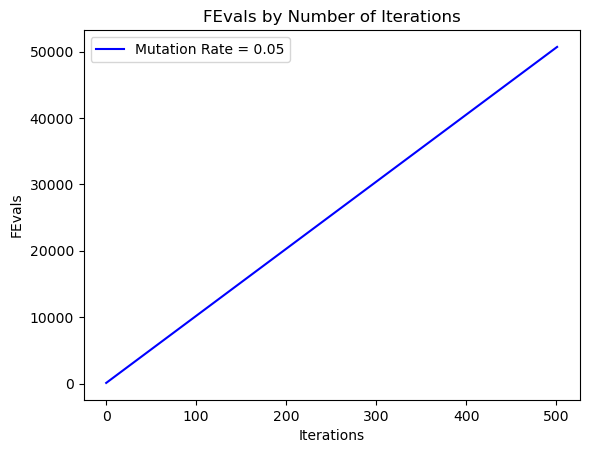

In [123]:
fig, ax = plt.subplots()
ax.plot(curves_ga_cp['Iteration'], curves_ga_cp['FEvals'],
    label = "Mutation Rate = 0.05", color = 'blue')

legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('FEvals')
plt.title('FEvals by Number of Iterations')
plt.show()

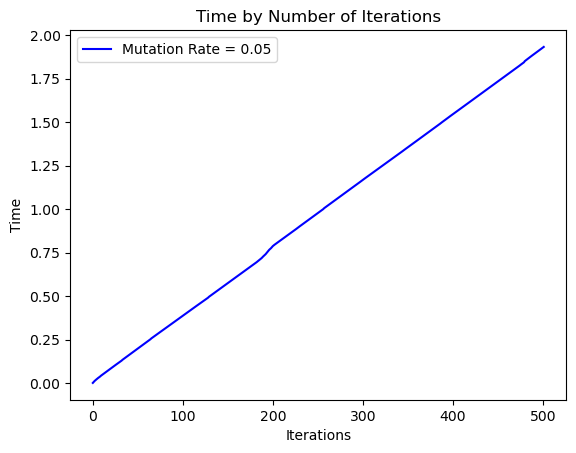

In [124]:
fig, ax = plt.subplots()
ax.plot(curves_ga_cp['Iteration'], curves_ga_cp['Time'],
    label = "Mutation Rate = 0.05", color = 'blue')

legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('Time')
plt.title('Time by Number of Iterations')
plt.show()

In [137]:
results_ga_cp = []

for i in np.arange(9,30):
    problem = mh.ContinuousPeaksGenerator.generate(seed=1, size=i)
    ga = GARunner(problem=problem,
              experiment_name='cp_ga',
              iteration_list=2 ** np.arange(11),
              mutation_rates=[0.05],
              population_sizes=[100],
              seed=1,
              generate_curves=True)
    stats, curves = ga.run()
    curves['ProblemSize'] = i
    best_fitness = curves['Fitness'].max()
    best_runs = curves[curves['Fitness'] == best_fitness]
    min_evals = best_runs['FEvals'].min()
    best_min_eval = best_runs[best_runs['FEvals'] == min_evals]
    results_ga_cp.append(best_min_eval)

In [138]:
df_ga_cp = results_ga_cp[0]

for result in results_ga_cp[1:]:
    df_ga_cp = pd.concat([df_ga_cp,result])

In [139]:
df_ga_cp

Iteration      Time  Fitness   FEvals  Population Size  Mutation Rate  \
1            1  0.006848     16.0    202.0              100           0.05   
3            3  0.014889     18.0    405.0              100           0.05   
4            4  0.018976     19.0    507.0              100           0.05   
1            1  0.006005     21.0    202.0              100           0.05   
6            6  0.027366     23.0    709.0              100           0.05   
3            3  0.015333     25.0    405.0              100           0.05   
30          30  0.124860     27.0   3135.0              100           0.05   
12          12  0.051673     29.0   1316.0              100           0.05   
44          44  0.181390     31.0   4550.0              100           0.05   
21          21  0.089128     33.0   2227.0              100           0.05   
109        109  0.438923     35.0  11114.0              100           0.05   
145        145  0.591462     37.0  14753.0              100           0.05   
52          52  0.215080     38.0   5359.0              100           0.05   
22          22  0.097047     40.0   2329.0              100           0.05   
71          71  0.292765     42.0   7280.0              100           0.05   
81          81  0.335854     44.0   8287.0              100           0.05   
18          18  0.079365     46.0   1927.0              100           0.05   
23          23  0.102611     48.0   2432.0              100           0.05   
39          39  0.167614     50.0   4045.0              100           0.05   
43          43  0.184022     52.0   4454.0              100           0.05   
85          85  0.364015     54.0   8694.0              100           0.05   

     max_iters  ProblemSize  
1         1024            9  
3         1024           10  
4         1024           11  
1         1024           12  
6         1024           13  
3         1024           14  
30        1024           15  
12        1024           16  
44        1024           17  
21        1024           18  
109       1024           19  
145       1024           20  
52        1024           21  
22        1024           22  
71        1024           23  
81        1024           24  
18        1024           25  
23        1024           26  
39        1024           27  
43        1024           28  
85        1024           29

In [140]:
fig, ax = plt.subplots()
ax.plot(df_ga_cp.ProblemSize, df_ga_cp.Fitness,
    label = "Fitness", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.title('Best Fitness Achieved as Problem Size Increases')
plt.show()

In [141]:
fig, ax = plt.subplots()
ax.plot(df_ga_cp.ProblemSize, df_ga_cp.FEvals,
    label = "FEvals", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('FEvals')
plt.title('# FEvals as Problem Size Increases')
plt.show()

In [142]:
fig, ax = plt.subplots()
ax.plot(df_ga_cp.ProblemSize, df_ga_cp.Iteration,
    label = "Iteration", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Iteration')
plt.title('# Iterations as Problem Size Increases')
plt.show()

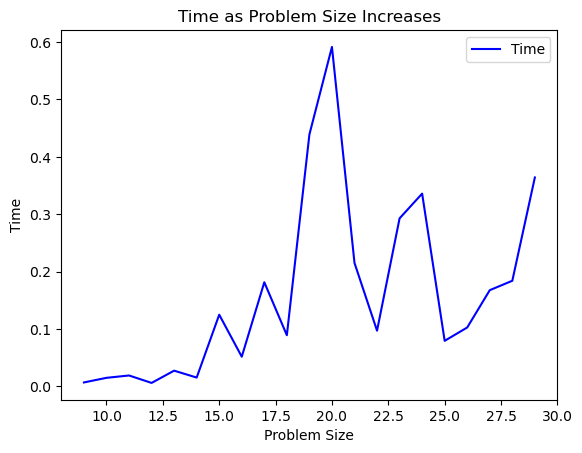

In [143]:
fig, ax = plt.subplots()
ax.plot(df_ga_cp.ProblemSize, df_ga_cp.Time,
    label = "Time", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Time')
plt.title('Time as Problem Size Increases')
plt.show()

In [144]:
m_cp = MIMICRunner(problem=cp,
                experiment_name='cp_mimic',
                seed=1,
                population_sizes=[100],
                keep_percent_list=[0.3],
                iteration_list=2 ** np.arange(11),
                max_attempts=100,
                generate_curves=True,
                )
stats_m_cp, curves_m_cp = m_cp.run()

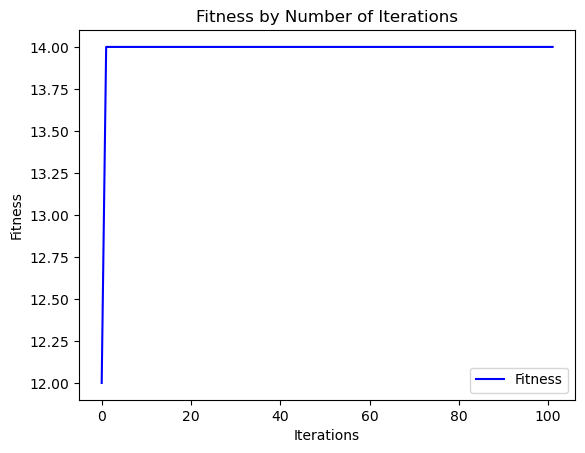

In [145]:
fig, ax = plt.subplots()
ax.plot(curves_m_cp['Iteration'], curves_m_cp['Fitness'],
    label = "Fitness", color = 'blue')

legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Fitness by Number of Iterations')
plt.show()

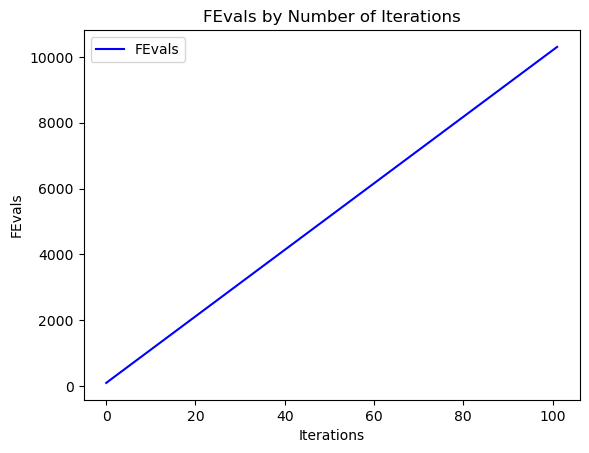

In [146]:
fig, ax = plt.subplots()
ax.plot(curves_m_cp['Iteration'], curves_m_cp['FEvals'],
    label = "FEvals", color = 'blue')

legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('FEvals')
plt.title('FEvals by Number of Iterations')
plt.show()

In [147]:
fig, ax = plt.subplots()
ax.plot(curves_m_cp['Iteration'], curves_m_cp['Time'],
    label = "Time", color = 'blue')

legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('Time')
plt.title('Time by Number of Iterations')
plt.show()

In [148]:
results_m_cp = []

for i in np.arange(9,30):
    problem = mh.ContinuousPeaksGenerator().generate(seed=1, size=i)
    m = MIMICRunner(problem=problem,
                experiment_name='cp_mimic',
                seed=1,
                population_sizes=[100],
                keep_percent_list=[0.3],
                iteration_list=2 ** np.arange(11),
                max_attempts=100,
                generate_curves=True,
                )
    stats, curves = m.run()
    curves['ProblemSize'] = i
    best_fitness = curves['Fitness'].max()
    best_runs = curves[curves['Fitness'] == best_fitness]
    min_evals = best_runs['FEvals'].min()
    best_min_eval = best_runs[best_runs['FEvals'] == min_evals]
    results_m_cp.append(best_min_eval)

In [149]:
df_m_cp = results_m_cp[0]

for result in results_m_cp[1:]:
    df_m_cp = pd.concat([df_m_cp,result])

In [150]:
df_m_cp

Iteration      Time  Fitness  FEvals  use_fast_mimic  Population Size  \
1           1  0.021193     16.0   202.0           False              100   
1           1  0.023253     18.0   202.0           False              100   
2           2  0.057342     19.0   304.0           False              100   
1           1  0.032273     20.0   202.0           False              100   
1           1  0.037157     21.0   202.0           False              100   
4           4  0.182353     25.0   506.0           False              100   
3           3  0.157912     27.0   405.0           False              100   
6           6  0.381634     27.0   709.0           False              100   
1           1  0.062232     26.0   202.0           False              100   
3           3  0.224054     30.0   405.0           False              100   
1           1  0.076779     30.0   202.0           False              100   
4           4  0.392710     37.0   508.0           False              100   
6           6  0.604409     36.0   708.0           False              100   
3           3  0.325909     34.0   406.0           False              100   
5           5  0.599818     39.0   609.0           False              100   
16         16  2.009512     41.0  1720.0           False              100   
7           7  0.971088     42.0   811.0           False              100   
7           7  1.060233     44.0   811.0           False              100   
1           1  0.150914     41.0   202.0           False              100   
2           2  0.342380     42.0   304.0           False              100   
8           8  1.496158     44.0   913.0           False              100   

    Keep Percent  max_iters  ProblemSize  
1            0.3       1024            9  
1            0.3       1024           10  
2            0.3       1024           11  
1            0.3       1024           12  
1            0.3       1024           13  
4            0.3       1024           14  
3            0.3       1024           15  
6            0.3       1024           16  
1            0.3       1024           17  
3            0.3       1024           18  
1            0.3       1024           19  
4            0.3       1024           20  
6            0.3       1024           21  
3            0.3       1024           22  
5            0.3       1024           23  
16           0.3       1024           24  
7            0.3       1024           25  
7            0.3       1024           26  
1            0.3       1024           27  
2            0.3       1024           28  
8            0.3       1024           29

In [151]:
fig, ax = plt.subplots()
ax.plot(df_m_cp.ProblemSize, df_m_cp.Fitness,
    label = "Fitness", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.title('Fitness as Problem Size Increases')
plt.show()

In [152]:
fig, ax = plt.subplots()
ax.plot(df_m_cp.ProblemSize, df_m_cp.FEvals,
    label = "FEvals", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('FEvals')
plt.title('FEvals as Problem Size Increases')
plt.show()

In [153]:
fig, ax = plt.subplots()
ax.plot(df_m_cp.ProblemSize, df_m_cp.Time,
    label = "Time", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Time')
plt.title('Time as Problem Size Increases')
plt.show()

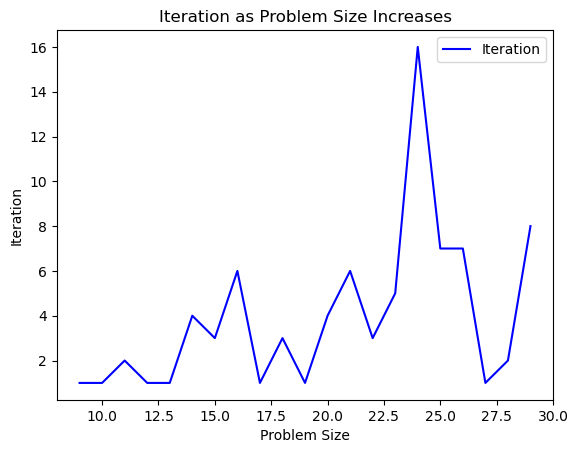

In [154]:
fig, ax = plt.subplots()
ax.plot(df_m_cp.ProblemSize, df_m_cp.Iteration,
    label = "Iteration", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Iteration')
plt.title('Iteration as Problem Size Increases')
plt.show()

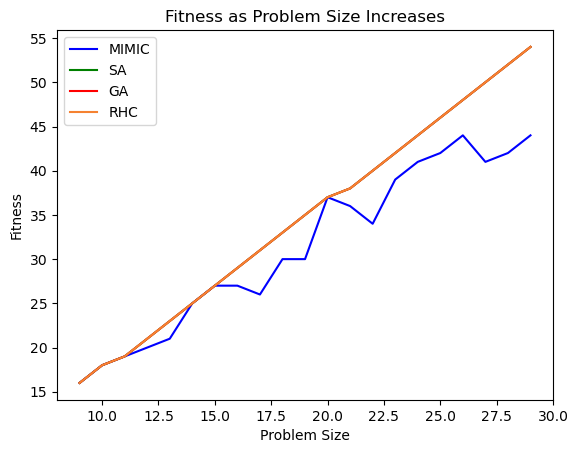

In [155]:
fig, ax = plt.subplots()
ax.plot(df_m_cp.ProblemSize, df_m_cp.Fitness,
    label = "MIMIC", color = 'b')
ax.plot(df_sa_cp.ProblemSize, df_sa_cp.Fitness,
    label = "SA", color = 'g')
ax.plot(df_ga_cp.ProblemSize, df_ga_cp.Fitness,
    label = "GA", color = 'r')
ax.plot(df_rhc_cp.ProblemSize, df_rhc_cp.Fitness,
    label = "RHC", color = '#f58231')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.title('Fitness as Problem Size Increases')
plt.show()

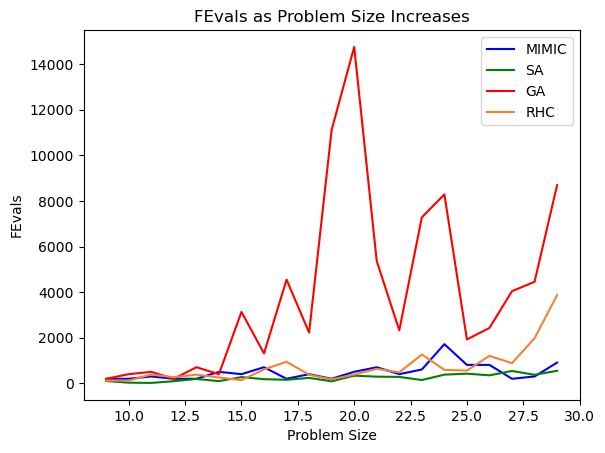

In [156]:
fig, ax = plt.subplots()
ax.plot(df_m_cp.ProblemSize, df_m_cp.FEvals,
    label = "MIMIC", color = 'b')
ax.plot(df_sa_cp.ProblemSize, df_sa_cp.FEvals,
    label = "SA", color = 'g')
ax.plot(df_ga_cp.ProblemSize, df_ga_cp.FEvals,
    label = "GA", color = 'r')
ax.plot(df_rhc_cp.ProblemSize, df_rhc_cp.FEvals,
    label = "RHC", color = '#f58231')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('FEvals')
plt.title('FEvals as Problem Size Increases')
plt.show()

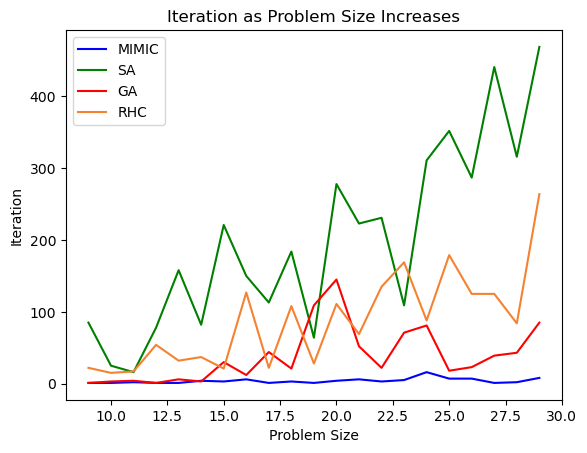

In [157]:
fig, ax = plt.subplots()
ax.plot(df_m_cp.ProblemSize, df_m_cp.Iteration,
    label = "MIMIC", color = 'b')
ax.plot(df_sa_cp.ProblemSize, df_sa_cp.Iteration,
    label = "SA", color = 'g')
ax.plot(df_ga_cp.ProblemSize, df_ga_cp.Iteration,
    label = "GA", color = 'r')
ax.plot(df_rhc_cp.ProblemSize, df_rhc_cp.Iteration,
    label = "RHC", color = '#f58231')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Iteration')
plt.title('Iteration as Problem Size Increases')
plt.show()

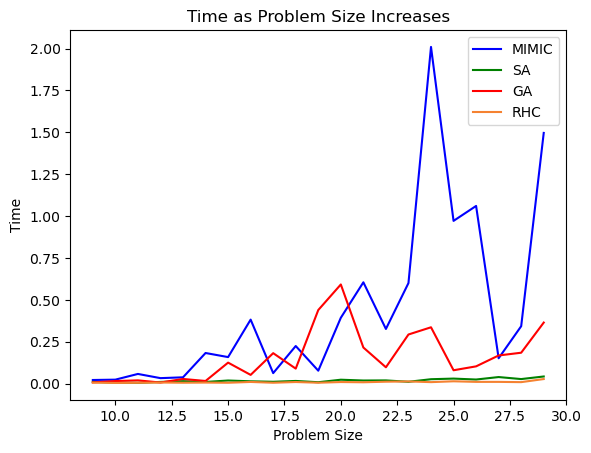

In [158]:
fig, ax = plt.subplots()
ax.plot(df_m_cp.ProblemSize, df_m_cp.Time,
    label = "MIMIC", color = 'b')
ax.plot(df_sa_cp.ProblemSize, df_sa_cp.Time,
    label = "SA", color = 'g')
ax.plot(df_ga_cp.ProblemSize, df_ga_cp.Time,
    label = "GA", color = 'r')
ax.plot(df_rhc_cp.ProblemSize, df_rhc_cp.Time,
    label = "RHC", color = '#f58231')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Time')
plt.title('Time as Problem Size Increases')
plt.show()

# Knapsack

In [258]:
ks = mh.KnapsackGenerator.generate(seed=1, number_of_items_types=8)
print(ks.get_state())

[0 0 0 0 0 0 0 0]


## Simulated Annealing

In [166]:
sa_ks = SARunner(problem=ks,
              experiment_name='ks_sa',
              output_directory=None,
              seed=1,
              iteration_list=2 ** np.arange(11),
              max_attempts=100,
              temperature_list=[0.5],
              decay_list=[mh.ExpDecay],
              generate_curves=True)
stats_sa_ks, curves_sa_ks = sa_ks.run()

In [169]:
best_fitness_sa_ks = curves_sa_ks['Fitness'].max()
best_runs_sa_ks = curves_sa_ks[curves_sa_ks['Fitness'] == best_fitness_sa_ks]
best_runs_sa_ks.head()

Iteration      Time  Fitness  FEvals Temperature  max_iters
23         23  0.006893    111.0    31.0         0.5       1024
24         24  0.006931    111.0    32.0         0.5       1024
25         25  0.006970    111.0    33.0         0.5       1024
26         26  0.007010    111.0    34.0         0.5       1024
27         27  0.007048    111.0    35.0         0.5       1024

In [173]:
min_evals_sa_ks = best_runs_sa_ks['FEvals'].max()
best_min_eval_sa_ks = best_runs_sa_ks[best_runs_sa_ks['FEvals'] == min_evals_sa_ks]
best_min_eval_sa_ks.head()

Iteration      Time  Fitness  FEvals Temperature  max_iters
123        123  0.013904    111.0   131.0         0.5       1024

In [171]:
stats_sa_ks

Iteration  Fitness  FEvals      Time                     State  \
0           0     41.0       0  0.000126  [3, 4, 0, 1, 3, 0, 0, 1]   
1           1     48.0       2  0.001474  [3, 4, 0, 1, 4, 0, 0, 1]   
2           2     58.0       4  0.002452  [3, 4, 0, 1, 4, 1, 0, 1]   
3           4     66.0       8  0.003347  [3, 4, 1, 1, 4, 1, 2, 1]   
4           8     86.0      13  0.004313  [3, 4, 1, 1, 4, 3, 2, 1]   
5          16    106.0      23  0.005544  [3, 4, 1, 1, 4, 4, 2, 3]   
6          32    111.0      40  0.007240  [3, 4, 1, 1, 4, 4, 2, 4]   
7          64    111.0      72  0.009894  [3, 4, 1, 1, 4, 4, 2, 4]   
8         128    111.0     131  0.013904  [3, 4, 1, 1, 4, 4, 2, 4]   
9         256    111.0     131  0.013904  [3, 4, 1, 1, 4, 4, 2, 4]   
10        512    111.0     131  0.013904  [3, 4, 1, 1, 4, 4, 2, 4]   
11       1024    111.0     131  0.013904  [3, 4, 1, 1, 4, 4, 2, 4]   

   schedule_type  schedule_init_temp  schedule_exp_const  schedule_min_temp  \
0    exponential                 0.5               0.005              0.001   
1    exponential                 0.5               0.005              0.001   
2    exponential                 0.5               0.005              0.001   
3    exponential                 0.5               0.005              0.001   
4    exponential                 0.5               0.005              0.001   
5    exponential                 0.5               0.005              0.001   
6    exponential                 0.5               0.005              0.001   
7    exponential                 0.5               0.005              0.001   
8    exponential                 0.5               0.005              0.001   
9    exponential                 0.5               0.005              0.001   
10   exponential                 0.5               0.005              0.001   
11   exponential                 0.5               0.005              0.001   

    schedule_current_value Temperature  max_iters  
0                 0.500000         0.5       1024  
1                 0.499996         0.5       1024  
2                 0.499994         0.5       1024  
3                 0.499992         0.5       1024  
4                 0.499989         0.5       1024  
5                 0.499986         0.5       1024  
6                 0.499982         0.5       1024  
7                 0.499975         0.5       1024  
8                 0.499965         0.5       1024  
9                 0.499965         0.5       1024  
10                0.499965         0.5       1024  
11                0.499965         0.5       1024

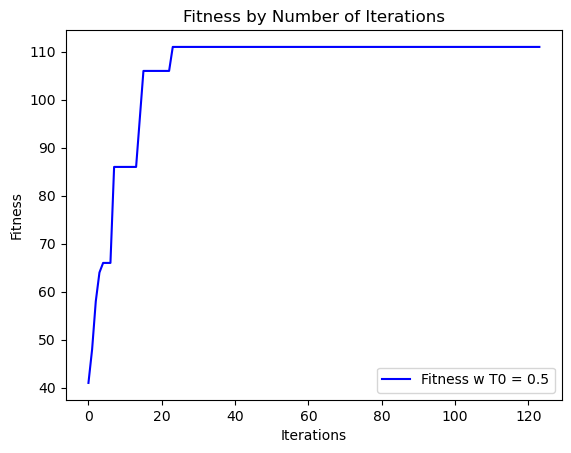

In [172]:
fig, ax = plt.subplots()

ax.plot(curves_sa_ks['Iteration'][curves_sa_ks['Temperature'] == mh.ExpDecay(0.5)], curves_sa_ks['Fitness'][curves_sa_ks['Temperature'] == mh.ExpDecay(0.5)], 
        label = "Fitness w T0 = 0.5", color = 'blue')


legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Fitness by Number of Iterations')
plt.show()

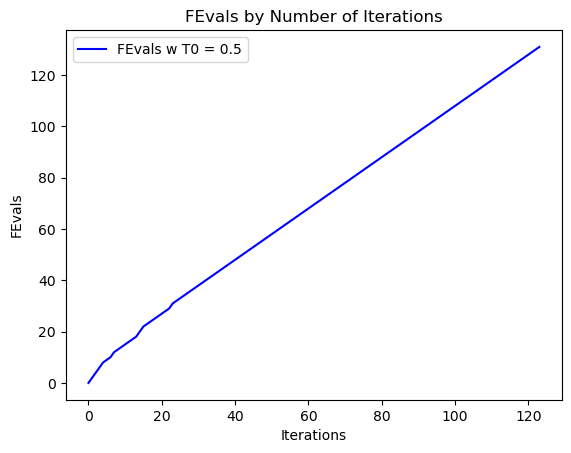

In [174]:
fig, ax = plt.subplots()

ax.plot(curves_sa_ks['Iteration'][curves_sa_ks['Temperature'] == mh.ExpDecay(0.5)], curves_sa_ks['FEvals'][curves_sa_ks['Temperature'] == mh.ExpDecay(0.5)], 
        label = "FEvals w T0 = 0.5", color = 'blue')


legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('FEvals')
plt.title('FEvals by Number of Iterations')
plt.show()

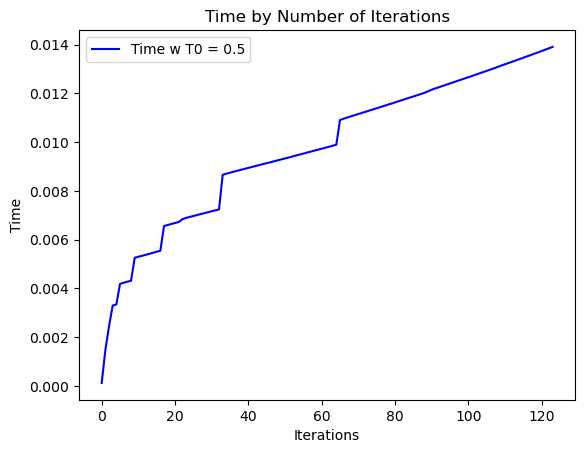

In [175]:
fig, ax = plt.subplots()

ax.plot(curves_sa_ks['Iteration'][curves_sa_ks['Temperature'] == mh.ExpDecay(0.5)], curves_sa_ks['Time'][curves_sa_ks['Temperature'] == mh.ExpDecay(0.5)], 
        label = "Time w T0 = 0.5", color = 'blue')


legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('Time')
plt.title('Time by Number of Iterations')
plt.show()

In [177]:
results_sa_ks = []

for i in np.arange(9,30,1):
    problem = mh.KnapsackGenerator.generate(seed=1, number_of_items_types=i)
    sa_ks = SARunner(problem=problem,
              experiment_name='ks_sa',
              output_directory=None,
              seed=1,
              iteration_list=2 ** np.arange(11),
              max_attempts=100,
              temperature_list=[0.5],
              decay_list=[mh.ExpDecay],
              generate_curves=True)
    stats_sa_ks, curves_sa_ks = sa_ks.run()
    curves_sa_ks['ProblemSize'] = i
    best_fitness_sa_ks = curves_sa_ks['Fitness'].max()
    best_runs_sa_ks = curves_sa_ks[curves_sa_ks['Fitness'] == best_fitness_sa_ks]
    min_evals_sa_ks = best_runs_sa_ks['FEvals'].min()
    best_min_eval_sa_ks = best_runs_sa_ks[best_runs_sa_ks['FEvals'] == min_evals_sa_ks]
    results_sa_ks.append(best_min_eval_sa_ks)
    

In [178]:
df_sa_ks = results_sa_ks[0]

for result in results_sa_ks[1:]:
    df_sa_ks = pd.concat([df_sa_ks,result])

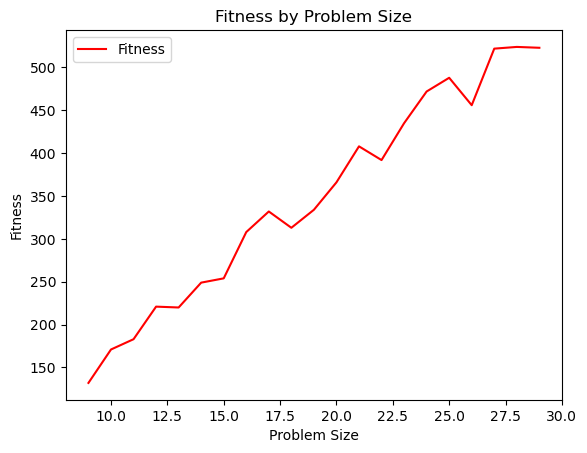

In [179]:
fig, ax = plt.subplots()
ax.plot(df_sa_ks['ProblemSize'], df_sa_ks['Fitness'],
    label = "Fitness", color = 'red')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.title('Fitness by Problem Size')
plt.show()

In [180]:
fig, ax = plt.subplots()
ax.plot(df_sa_ks['ProblemSize'], df_sa_ks['FEvals'],
    label = "FEvals", color = 'red')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('FEvals')
plt.title('FEvals by Problem Size')
plt.show()

In [181]:
fig, ax = plt.subplots()
ax.plot(df_sa_ks['ProblemSize'], df_sa_ks['Iteration'],
    label = "Iteration", color = 'red')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Iteration')
plt.title('Iteration by Problem Size')
plt.show()

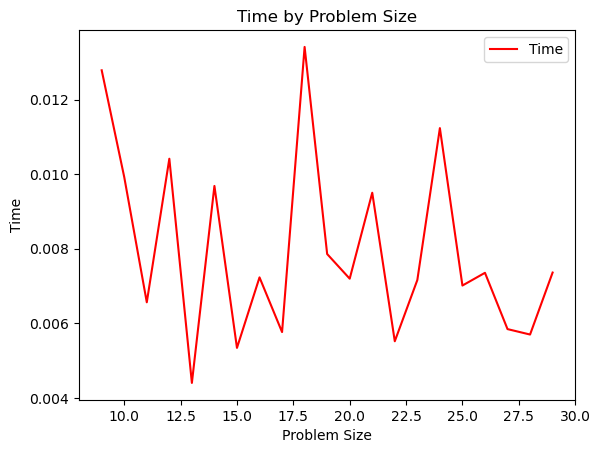

In [182]:
fig, ax = plt.subplots()
ax.plot(df_sa_ks['ProblemSize'], df_sa_ks['Time'],
    label = "Time", color = 'red')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Time')
plt.title('Time by Problem Size')
plt.show()

## Random Hill Climbing

In [183]:
rhc_ks = RHCRunner(problem=ks, 
                experiment_name='ks_rhc', 
                seed=1, 
                restart_list=[20], 
                max_attempts=100, 
                generate_curves=True,
                iteration_list=2 ** np.arange(11))
stats_rhc_ks, curves_rhc_ks = rhc_ks.run()

In [184]:
curves_rhc_ks

Iteration      Time  Fitness  FEvals  Restarts  max_iters  \
0             0  0.000113     41.0     0.0        20       1024   
1             1  0.001649     48.0     2.0        20       1024   
2             2  0.002819     58.0     4.0        20       1024   
3             3  0.003604     64.0     6.0        20       1024   
4             4  0.003651     66.0     8.0        20       1024   
...         ...       ...      ...     ...       ...        ...   
2532        111  0.012363    125.0  2636.0        20       1024   
2533        112  0.012410    125.0  2637.0        20       1024   
2534        113  0.012460    125.0  2638.0        20       1024   
2535        114  0.012510    125.0  2639.0        20       1024   
2536        115  0.012559    125.0  2640.0        20       1024   

      current_restart  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
2532               20  
2533               20  
2534               20  
2535               20  
2536               20  

[2537 rows x 7 columns]

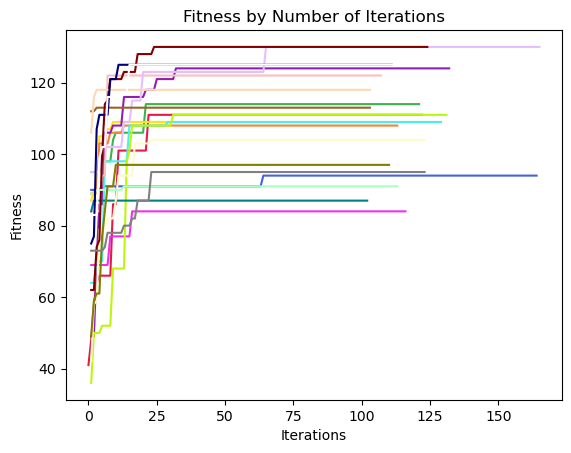

In [185]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']

fig, ax = plt.subplots()
for i in np.arange(0,21,1):
    ax.plot(curves_rhc_ks['Iteration'][curves_rhc_ks['current_restart']==i], curves_rhc_ks['Fitness'][curves_rhc_ks['current_restart']==i],
        label = f"restart = {i}", color = colors[i])

plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Fitness by Number of Iterations')
plt.show()

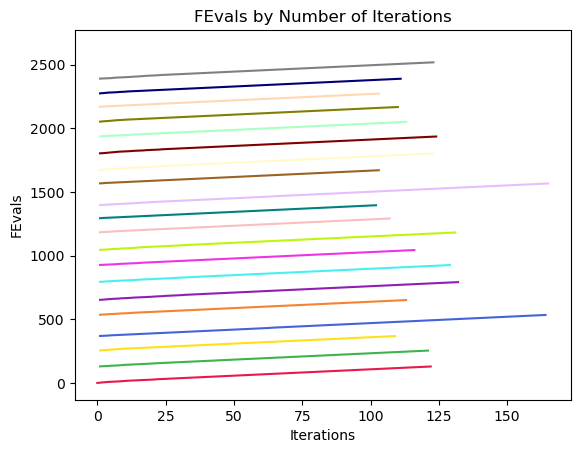

In [186]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']

fig, ax = plt.subplots()
for i in np.arange(0,21,1):
    ax.plot(curves_rhc_ks['Iteration'][curves_rhc_ks['current_restart']==i], curves_rhc_ks['FEvals'][curves_rhc_ks['current_restart']==i],
        label = f"restart = {i}", color = colors[i])

plt.xlabel('Iterations')
plt.ylabel('FEvals')
plt.title('FEvals by Number of Iterations')
plt.show()

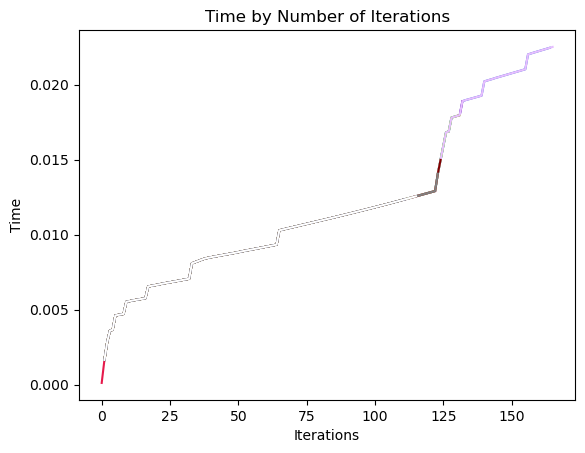

In [187]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']

fig, ax = plt.subplots()
for i in np.arange(0,21,1):
    ax.plot(curves_rhc_ks['Iteration'][curves_rhc_ks['current_restart']==i], curves_rhc_ks['Time'][curves_rhc_ks['current_restart']==i],
        label = f"restart = {i}", color = colors[i])

plt.xlabel('Iterations')
plt.ylabel('Time')
plt.title('Time by Number of Iterations')
plt.show()

In [188]:
results_rhc_ks = []

for i in np.arange(9,30):
    problem = mh.KnapsackGenerator.generate(seed=1, number_of_items_types=i)
    rhc = RHCRunner(problem=problem, 
                    experiment_name='ks_rhc', 
                    seed=1, 
                    restart_list=[20], 
                    max_attempts=100, 
                    generate_curves=True,
                    iteration_list=2 ** np.arange(11))
    stats, curves = rhc.run()
    curves['ProblemSize'] = i
    best_fitness = curves['Fitness'].max()
    best_runs = curves[curves['Fitness'] == best_fitness]
    min_evals = best_runs['FEvals'].min()
    best_min_eval = best_runs[best_runs['FEvals'] == min_evals]
    results_rhc_ks.append(best_min_eval)

In [189]:
df_rhc_ks = results_rhc_ks[0]

for result in results_rhc_ks[1:]:
    df_rhc_ks = pd.concat([df_rhc_ks,result])

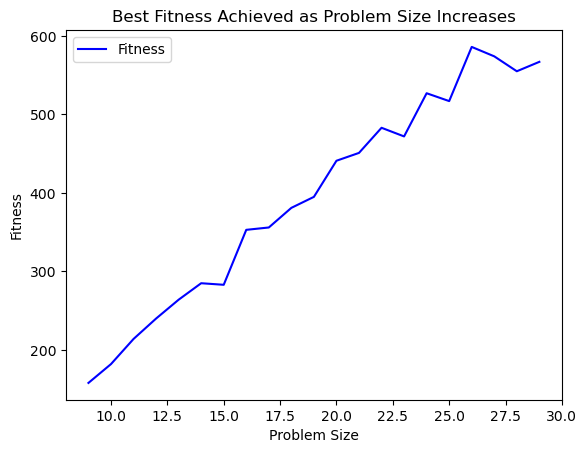

In [190]:
fig, ax = plt.subplots()
ax.plot(df_rhc_ks.ProblemSize, df_rhc_ks.Fitness,
    label = "Fitness", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.title('Best Fitness Achieved as Problem Size Increases')
plt.show()

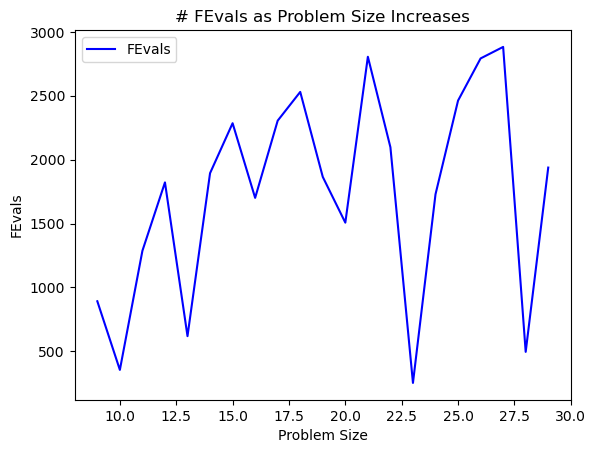

In [191]:
fig, ax = plt.subplots()
ax.plot(df_rhc_ks.ProblemSize, df_rhc_ks.FEvals,
    label = "FEvals", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('FEvals')
plt.title('# FEvals as Problem Size Increases')
plt.show()

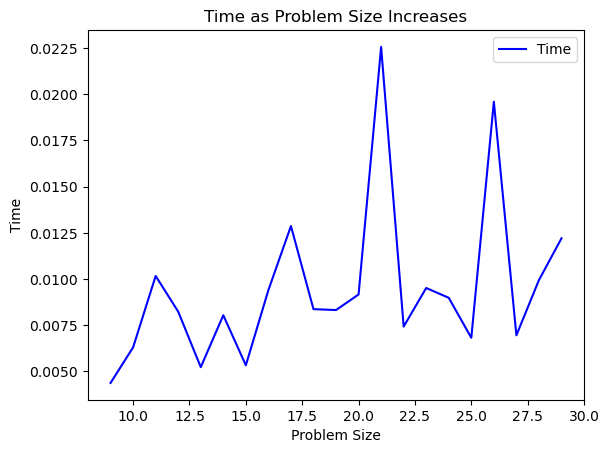

In [192]:
fig, ax = plt.subplots()
ax.plot(df_rhc_ks.ProblemSize, df_rhc_ks.Time,
    label = "Time", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Time')
plt.title('Time as Problem Size Increases')
plt.show()

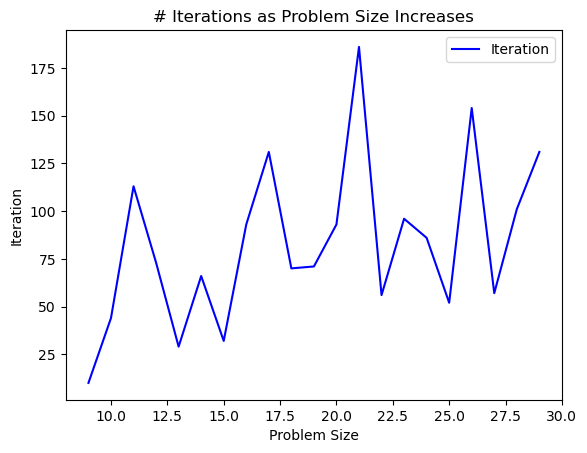

In [193]:
fig, ax = plt.subplots()
ax.plot(df_rhc_ks.ProblemSize, df_rhc_ks.Iteration,
    label = "Iteration", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Iteration')
plt.title('# Iterations as Problem Size Increases')
plt.show()

## Genetic Algorithm

In [194]:
ga_ks = GARunner(problem=ks,
              experiment_name='ks_ga',
              iteration_list=2 ** np.arange(11),
              mutation_rates=[0.05],
              population_sizes=[100],
              seed=1,
              generate_curves=True)
stats_ga_ks, curves_ga_ks = ga_ks.run()

In [195]:
curves_ga_ks.shape

(518, 7)

In [196]:
fig, ax = plt.subplots()
ax.plot(curves_ga_ks['Iteration'], curves_ga_ks['Fitness'],
    label = "Mutation Rate = 0.05", color = 'blue')

legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Fitness by Number of Iterations')
plt.show()

In [197]:
fig, ax = plt.subplots()
ax.plot(curves_ga_ks['Iteration'], curves_ga_ks['FEvals'],
    label = "Mutation Rate = 0.05", color = 'blue')

legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('FEvals')
plt.title('FEvals by Number of Iterations')
plt.show()

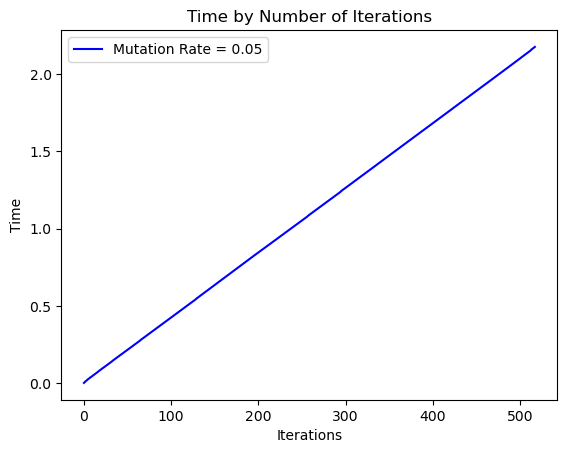

In [198]:
fig, ax = plt.subplots()
ax.plot(curves_ga_ks['Iteration'], curves_ga_ks['Time'],
    label = "Mutation Rate = 0.05", color = 'blue')

legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('Time')
plt.title('Time by Number of Iterations')
plt.show()

In [199]:
results_ga_ks = []

for i in np.arange(9,30):
    problem = mh.KnapsackGenerator.generate(seed=1, number_of_items_types=i)
    ga = GARunner(problem=problem,
              experiment_name='ks_ga',
              iteration_list=2 ** np.arange(11),
              mutation_rates=[0.05],
              population_sizes=[100],
              seed=1,
              generate_curves=True)
    stats, curves = ga.run()
    curves['ProblemSize'] = i
    best_fitness = curves['Fitness'].max()
    best_runs = curves[curves['Fitness'] == best_fitness]
    min_evals = best_runs['FEvals'].min()
    best_min_eval = best_runs[best_runs['FEvals'] == min_evals]
    results_ga_ks.append(best_min_eval)

In [200]:
df_ga_ks = results_ga_ks[0]

for result in results_ga_ks[1:]:
    df_ga_ks = pd.concat([df_ga_ks,result])

In [201]:
df_ga_ks

Iteration      Time  Fitness  FEvals  Population Size  Mutation Rate  \
17         17  0.081062    162.0  1824.0              100           0.05   
13         13  0.062235    187.0  1419.0              100           0.05   
23         23  0.105574    219.0  2430.0              100           0.05   
26         26  0.119536    248.0  2736.0              100           0.05   
24         24  0.112584    273.0  2537.0              100           0.05   
18         18  0.084338    300.0  1930.0              100           0.05   
18         18  0.083895    311.0  1928.0              100           0.05   
27         27  0.123184    372.0  2840.0              100           0.05   
29         29  0.130013    375.0  3042.0              100           0.05   
26         26  0.118399    414.0  2738.0              100           0.05   
83         83  0.364433    436.0  8499.0              100           0.05   
26         26  0.119057    477.0  2743.0              100           0.05   
32         32  0.143067    514.0  3347.0              100           0.05   
66         66  0.303427    550.0  6787.0              100           0.05   
31         31  0.139505    576.0  3250.0              100           0.05   
33         33  0.150838    587.0  3447.0              100           0.05   
39         39  0.175070    578.0  4050.0              100           0.05   
29         29  0.131129    627.0  3043.0              100           0.05   
77         77  0.347775    638.0  7904.0              100           0.05   
49         49  0.219657    635.0  5074.0              100           0.05   
40         40  0.182864    644.0  4160.0              100           0.05   

    max_iters  ProblemSize  
17       1024            9  
13       1024           10  
23       1024           11  
26       1024           12  
24       1024           13  
18       1024           14  
18       1024           15  
27       1024           16  
29       1024           17  
26       1024           18  
83       1024           19  
26       1024           20  
32       1024           21  
66       1024           22  
31       1024           23  
33       1024           24  
39       1024           25  
29       1024           26  
77       1024           27  
49       1024           28  
40       1024           29

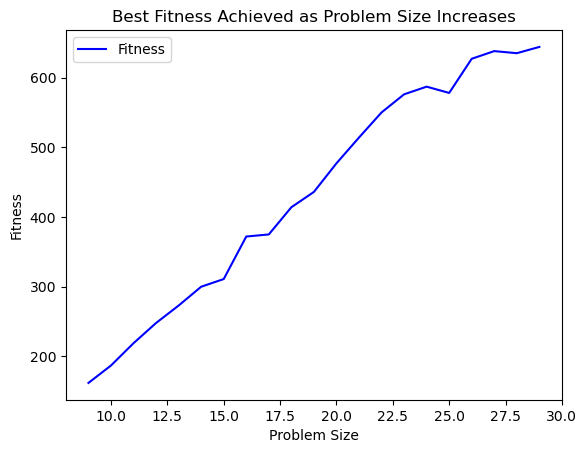

In [202]:
fig, ax = plt.subplots()
ax.plot(df_ga_ks.ProblemSize, df_ga_ks.Fitness,
    label = "Fitness", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.title('Best Fitness Achieved as Problem Size Increases')
plt.show()

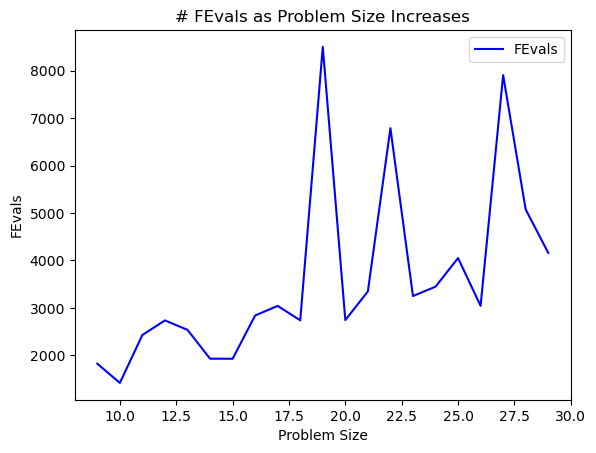

In [203]:
fig, ax = plt.subplots()
ax.plot(df_ga_ks.ProblemSize, df_ga_ks.FEvals,
    label = "FEvals", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('FEvals')
plt.title('# FEvals as Problem Size Increases')
plt.show()

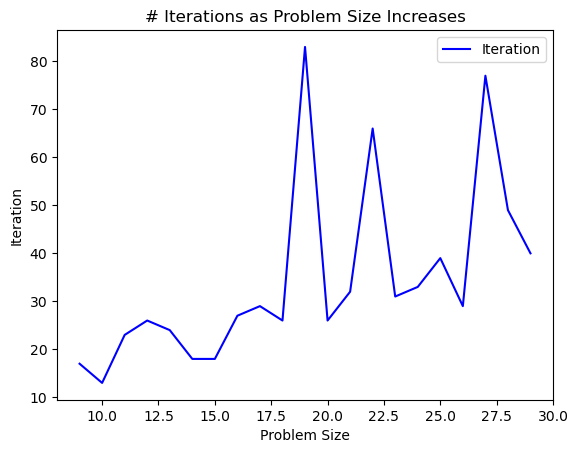

In [204]:
fig, ax = plt.subplots()
ax.plot(df_ga_ks.ProblemSize, df_ga_ks.Iteration,
    label = "Iteration", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Iteration')
plt.title('# Iterations as Problem Size Increases')
plt.show()

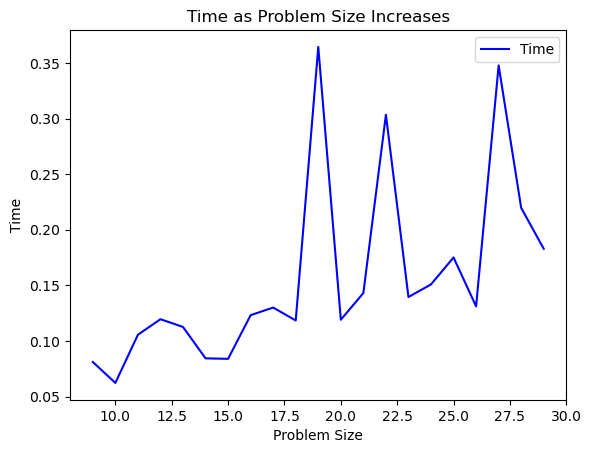

In [205]:
fig, ax = plt.subplots()
ax.plot(df_ga_ks.ProblemSize, df_ga_ks.Time,
    label = "Time", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Time')
plt.title('Time as Problem Size Increases')
plt.show()

In [206]:
m_ks = MIMICRunner(problem=ks,
                experiment_name='ks_mimic',
                seed=1,
                population_sizes=[100],
                keep_percent_list=[0.3],
                iteration_list=2 ** np.arange(11),
                max_attempts=100,
                generate_curves=True,
                )
stats_m_ks, curves_m_ks = m_ks.run()

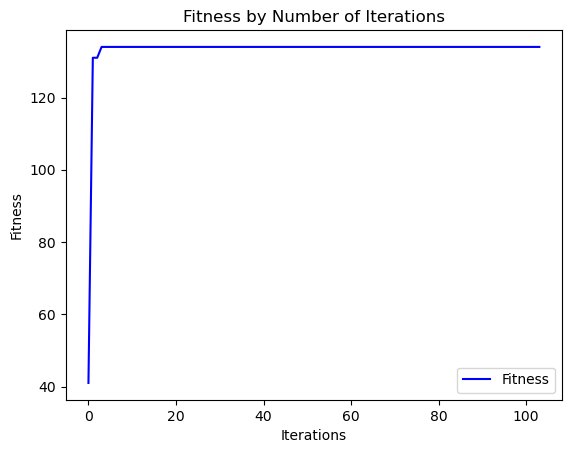

In [207]:
fig, ax = plt.subplots()
ax.plot(curves_m_ks['Iteration'], curves_m_ks['Fitness'],
    label = "Fitness", color = 'blue')

legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Fitness by Number of Iterations')
plt.show()

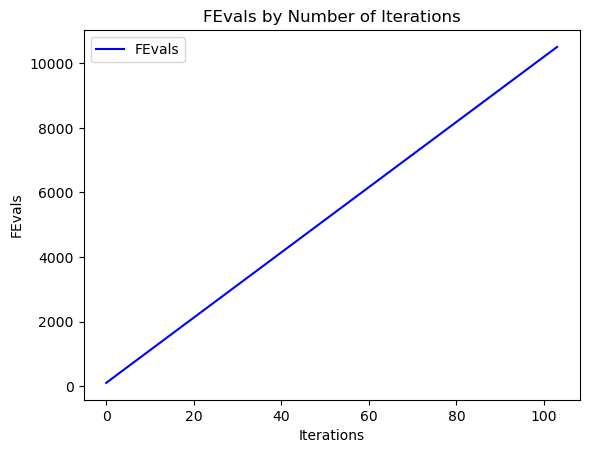

In [208]:
fig, ax = plt.subplots()
ax.plot(curves_m_ks['Iteration'], curves_m_ks['FEvals'],
    label = "FEvals", color = 'blue')

legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('FEvals')
plt.title('FEvals by Number of Iterations')
plt.show()

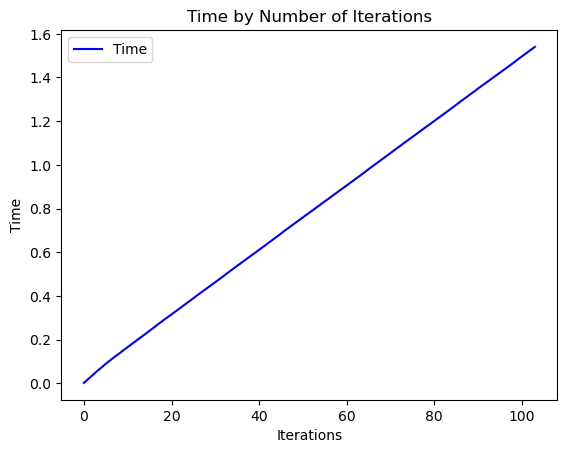

In [209]:
fig, ax = plt.subplots()
ax.plot(curves_m_ks['Iteration'], curves_m_ks['Time'],
    label = "Time", color = 'blue')

legend = ax.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('Time')
plt.title('Time by Number of Iterations')
plt.show()

In [210]:
results_m_ks = []

for i in np.arange(9,30):
    problem = mh.KnapsackGenerator().generate(seed=1, number_of_items_types=i)
    m = MIMICRunner(problem=problem,
                experiment_name='ks_mimic',
                seed=1,
                population_sizes=[100],
                keep_percent_list=[0.3],
                iteration_list=2 ** np.arange(11),
                max_attempts=100,
                generate_curves=True,
                )
    stats, curves = m.run()
    curves['ProblemSize'] = i
    best_fitness = curves['Fitness'].max()
    best_runs = curves[curves['Fitness'] == best_fitness]
    min_evals = best_runs['FEvals'].min()
    best_min_eval = best_runs[best_runs['FEvals'] == min_evals]
    results_m_ks.append(best_min_eval)

In [211]:
df_m_ks = results_m_ks[0]

for result in results_m_ks[1:]:
    df_m_ks = pd.concat([df_m_ks,result])

In [212]:
df_m_ks

Iteration      Time  Fitness  FEvals  use_fast_mimic  Population Size  \
5           5  0.110912    150.0   608.0           False              100   
5           5  0.131128    180.0   608.0           False              100   
6           6  0.185237    215.0   710.0           False              100   
8           8  0.284632    242.0   911.0           False              100   
3           3  0.126656    255.0   406.0           False              100   
4           4  0.202449    294.0   508.0           False              100   
6           6  0.324077    310.0   712.0           False              100   
8           8  0.480874    351.0   912.0           False              100   
14         14  0.979647    367.0  1519.0           False              100   
8           8  0.611661    397.0   915.0           False              100   
8           8  0.697763    399.0   914.0           False              100   
11         11  1.034113    465.0  1218.0           False              100   
6           6  0.628895    483.0   712.0           False              100   
7           7  0.794851    527.0   813.0           False              100   
10         10  1.227734    530.0  1119.0           False              100   
9           9  1.221529    551.0  1016.0           False              100   
8           8  1.149961    553.0   915.0           False              100   
8           8  1.256500    619.0   915.0           False              100   
13         13  2.147601    612.0  1422.0           False              100   
14         14  2.495310    633.0  1522.0           False              100   
19         19  3.624013    626.0  2032.0           False              100   

    Keep Percent  max_iters  ProblemSize  
5            0.3       1024            9  
5            0.3       1024           10  
6            0.3       1024           11  
8            0.3       1024           12  
3            0.3       1024           13  
4            0.3       1024           14  
6            0.3       1024           15  
8            0.3       1024           16  
14           0.3       1024           17  
8            0.3       1024           18  
8            0.3       1024           19  
11           0.3       1024           20  
6            0.3       1024           21  
7            0.3       1024           22  
10           0.3       1024           23  
9            0.3       1024           24  
8            0.3       1024           25  
8            0.3       1024           26  
13           0.3       1024           27  
14           0.3       1024           28  
19           0.3       1024           29

In [213]:
fig, ax = plt.subplots()
ax.plot(df_m_ks.ProblemSize, df_m_ks.Fitness,
    label = "Fitness", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.title('Fitness as Problem Size Increases')
plt.show()

In [214]:
fig, ax = plt.subplots()
ax.plot(df_m_ks.ProblemSize, df_m_ks.FEvals,
    label = "FEvals", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('FEvals')
plt.title('FEvals as Problem Size Increases')
plt.show()

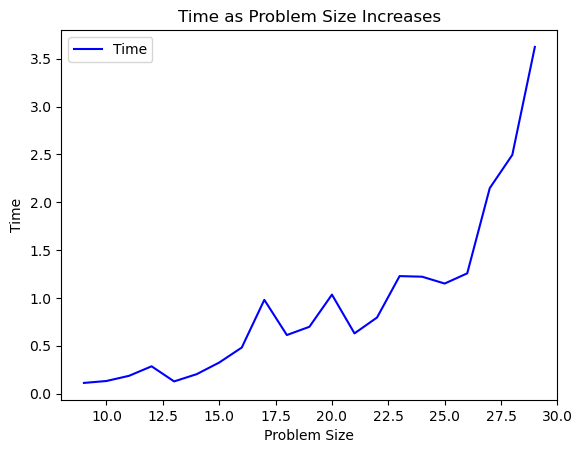

In [215]:
fig, ax = plt.subplots()
ax.plot(df_m_ks.ProblemSize, df_m_ks.Time,
    label = "Time", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Time')
plt.title('Time as Problem Size Increases')
plt.show()

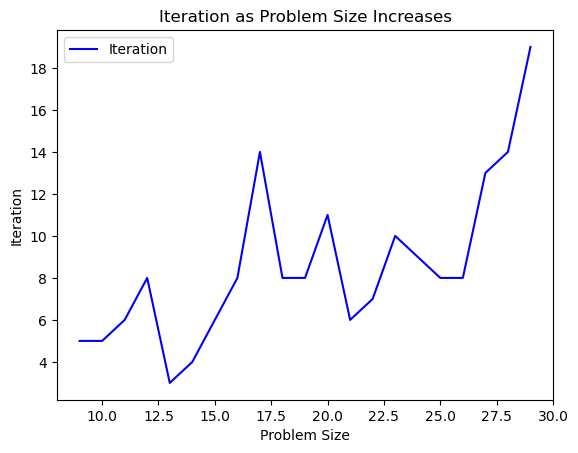

In [216]:
fig, ax = plt.subplots()
ax.plot(df_m_ks.ProblemSize, df_m_ks.Iteration,
    label = "Iteration", color = 'b')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Iteration')
plt.title('Iteration as Problem Size Increases')
plt.show()

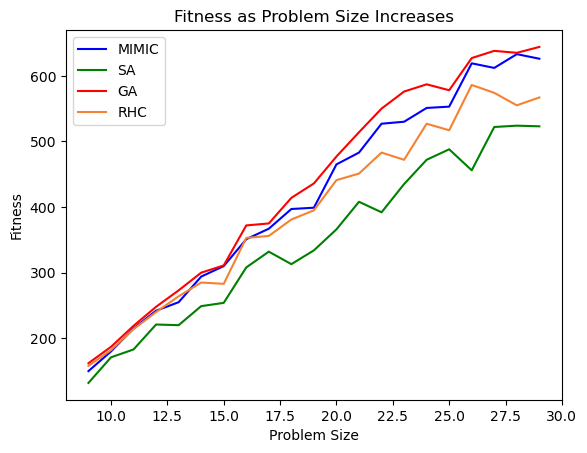

In [217]:
fig, ax = plt.subplots()
ax.plot(df_m_ks.ProblemSize, df_m_ks.Fitness,
    label = "MIMIC", color = 'b')
ax.plot(df_sa_ks.ProblemSize, df_sa_ks.Fitness,
    label = "SA", color = 'g')
ax.plot(df_ga_ks.ProblemSize, df_ga_ks.Fitness,
    label = "GA", color = 'r')
ax.plot(df_rhc_ks.ProblemSize, df_rhc_ks.Fitness,
    label = "RHC", color = '#f58231')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.title('Fitness as Problem Size Increases')
plt.show()

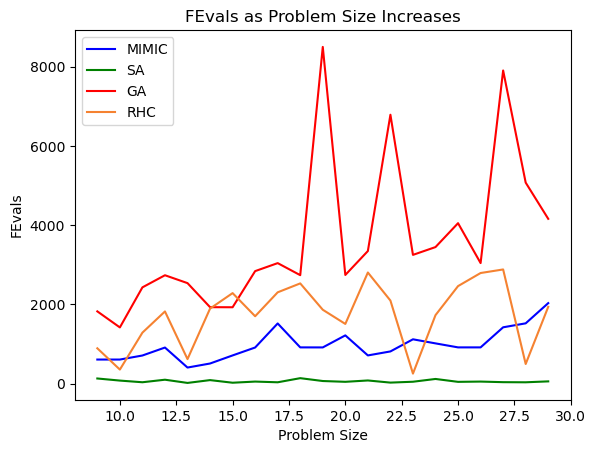

In [218]:
fig, ax = plt.subplots()
ax.plot(df_m_ks.ProblemSize, df_m_ks.FEvals,
    label = "MIMIC", color = 'b')
ax.plot(df_sa_ks.ProblemSize, df_sa_ks.FEvals,
    label = "SA", color = 'g')
ax.plot(df_ga_ks.ProblemSize, df_ga_ks.FEvals,
    label = "GA", color = 'r')
ax.plot(df_rhc_ks.ProblemSize, df_rhc_ks.FEvals,
    label = "RHC", color = '#f58231')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('FEvals')
plt.title('FEvals as Problem Size Increases')
plt.show()

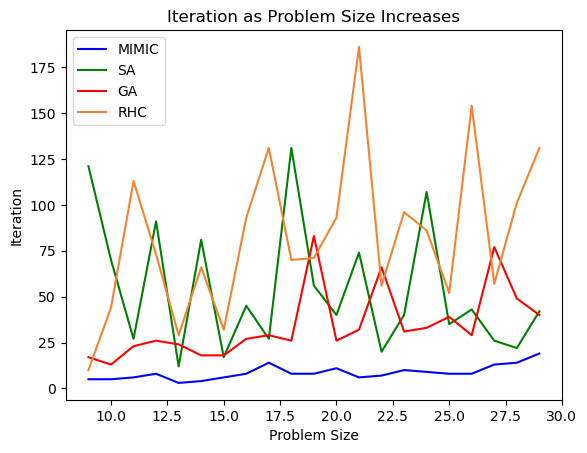

In [219]:
fig, ax = plt.subplots()
ax.plot(df_m_ks.ProblemSize, df_m_ks.Iteration,
    label = "MIMIC", color = 'b')
ax.plot(df_sa_ks.ProblemSize, df_sa_ks.Iteration,
    label = "SA", color = 'g')
ax.plot(df_ga_ks.ProblemSize, df_ga_ks.Iteration,
    label = "GA", color = 'r')
ax.plot(df_rhc_ks.ProblemSize, df_rhc_ks.Iteration,
    label = "RHC", color = '#f58231')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Iteration')
plt.title('Iteration as Problem Size Increases')
plt.show()

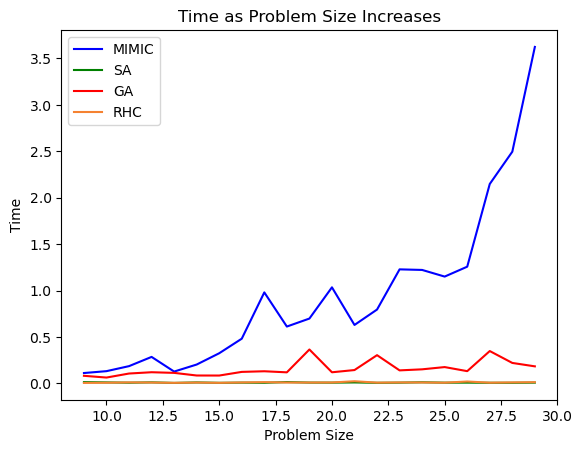

In [220]:
fig, ax = plt.subplots()
ax.plot(df_m_ks.ProblemSize, df_m_ks.Time,
    label = "MIMIC", color = 'b')
ax.plot(df_sa_ks.ProblemSize, df_sa_ks.Time,
    label = "SA", color = 'g')
ax.plot(df_ga_ks.ProblemSize, df_ga_ks.Time,
    label = "GA", color = 'r')
ax.plot(df_rhc_ks.ProblemSize, df_rhc_ks.Time,
    label = "RHC", color = '#f58231')


legend = ax.legend(loc='best')
plt.xlabel('Problem Size')
plt.ylabel('Time')
plt.title('Time as Problem Size Increases')
plt.show()